# Predict whether passanger survived sinking of Titanic or not using machine learning models

## 1. Definition

> How well can we predict if a passanger survived the sinking of the Titanic or not.

## 2. Data

The data is download from the Kaggle Titanic: Machine learning from disaster: https://www.kaggle.com/c/titanic/overview

The data for this competition has been split into two groups:
1. training set (train.csv) - the training set should be used to train the model
2. test set (test.csv - should be used how well a model performes on unseen data.

## 3. Evaluation
> The evaluation metric for this competition is **accuracy**. The score is precentage of passangers the model correctly predict

**Note:** The goal is to predict whether a passenger survived or not.

## 4. Features

Kaggle provides dictionary explaining all of the features in the data. https://www.kaggle.com/c/titanic/data

#### Variable Notes

**pclass:** A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...
    Sibling = brother, sister, stepbrother, stepsister
    Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way...
    Parent = mother, father
    Child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.

## Import relevant libraries and Titanic training and test datasets

In [2]:
## First, let's import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# To visualize missing values
import missingno

# Machine Learning
import catboost
from sklearn.metrics import accuracy_score
from sklearn import model_selection, tree, preprocessing ,metrics
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv


%matplotlib inline
mpl.rcParams["patch.force_edgecolor"]=True

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import training data
data1 = pd.read_csv("data/train.csv")
train = data1.copy()
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Import test data
data2 = pd.read_csv("data/test.csv")
test = data2.copy()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Descriptive analysis on training set (EDA)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


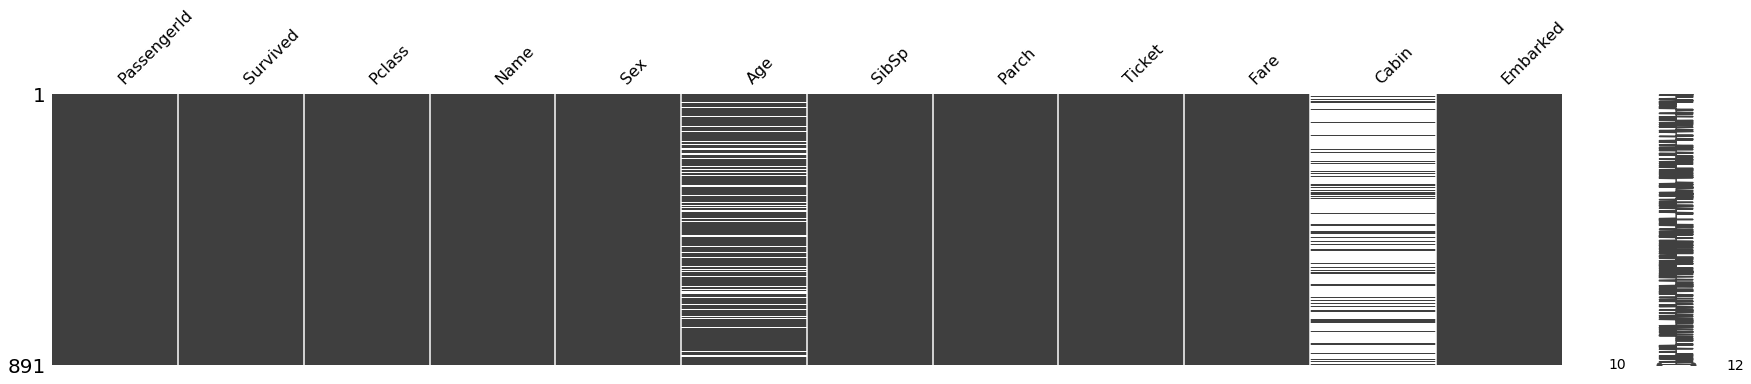

In [8]:
# Plot graphic of missing values
missingno.matrix(train, figsize=(30,5))

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# What procentage of missing values in column Age and Cabin
age_column = (train["Age"].isna().sum() / len(train)) *100

cabin_column = (train["Cabin"].isna().sum() / len(train)) * 100

print(f"Procent of missing data in 'Age' column is: {round(age_column,2)}%")
print(f"Procent of missing data in 'Cabin' column is: {round(cabin_column, 2)}%")

Procent of missing data in 'Age' column is: 19.87%
Procent of missing data in 'Cabin' column is: 77.1%


> The procentage of missing data in column "Cabin" is 77.1%, therefore I will drop this column from further analysis.

> Column "Age" I will leave and try to figure out how to fill missing values in this column

In [11]:
# Drop Cabin column
train.drop(["Cabin"], axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Check every column one by one in train dataframe

### PassangerId column

In [12]:
train.PassengerId.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

I'll also drop this column as it has no value for further analysis

In [13]:
train.drop(["PassengerId"], axis=1, inplace=True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Survived column

1. We'll train models with this column as y_train

In [14]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
survived_dict = {"survived":train.Survived.value_counts()[1],
                 "Not Survived": train.Survived.value_counts()[0]}

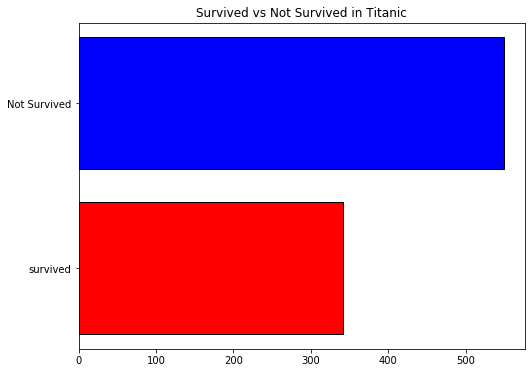

In [16]:
# Create a plot for 'Survived' column
fig, ax = plt.subplots(figsize=(8,6))

# Plot
ax.barh(list(survived_dict.keys()),list(survived_dict.values()), color=["red", "blue"])

# Description
ax.set(title="Survived vs Not Survived in Titanic");

### Pclass column

 1st = Upper 2nd = Middle 3rd = Lower

In [17]:
np.sort(train["Pclass"].unique())

array([1, 2, 3])

In [18]:
train["Pclass"].dtype

dtype('int64')

In [19]:
pclass_count = train["Pclass"].value_counts().sort_index()

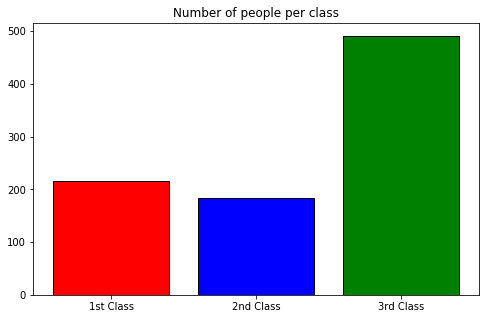

In [20]:
class_list = ["1st Class", "2nd Class", "3rd Class"]

class_dict = {}
for i , count in enumerate(pclass_count):
    class_dict[class_list[i]] = count
    
# Create a plot for Passenger Class
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(class_dict.keys(), class_dict.values(), color=["red", "blue", "green"])

# Describe plot
ax.set(title="Number of people per class");

[Text(0.5, 1.0, 'Survived per Passenger Class')]

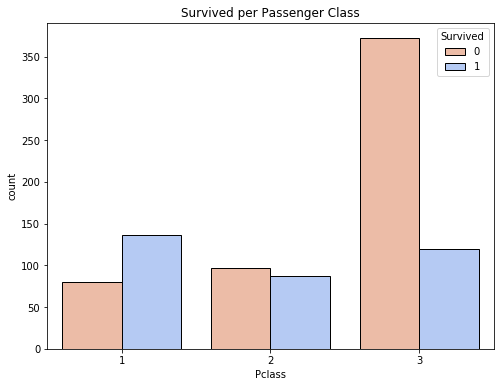

In [21]:
# Create a plot
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot("Pclass", data=train, hue="Survived", palette="coolwarm_r")

ax.set(title="Survived per Passenger Class")

In [22]:
# How many survived in the Pclass
surv_class = train.groupby("Pclass").sum()["Survived"]

In [23]:
surv_class

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [24]:
class_sum = train.Pclass.value_counts().sort_index()

In [25]:
class_sum

1    216
2    184
3    491
Name: Pclass, dtype: int64

In [26]:
survived_class1 = (surv_class[1] / class_sum[1])* 100
survived_class2 = (surv_class[2] / class_sum[2]) * 100
survived_class3 = (surv_class[3] / class_sum[3]) * 100

print(f"Survived procentage in 1st Class: {round(survived_class1, 2)}%")
print(f"Survived procentage in 2nd Class: {round(survived_class2, 2)}%")
print(f"Survived procentage in 3rd Class: {round(survived_class3, 2)}%")

Survived procentage in 1st Class: 62.96%
Survived procentage in 2nd Class: 47.28%
Survived procentage in 3rd Class: 24.24%


In [27]:
train.Pclass.dtype

dtype('int64')

In [28]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Name column

In [29]:
# Check 5 rows of the dataframe
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [30]:
train.Name.dtype

dtype('O')

In [31]:
# Display hole series or dataframe
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    print(train.Name)

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [32]:
# Extract title from string
name_list = list(train.Name)

title = []

for i in range(len(name_list)):
    
    person = name_list[i].split(",")[1].split(".")[0]
    person = person.strip(" ")
    
    title.append(person)   

In [33]:
title_series = pd.Series(title)

In [34]:
title_series.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [35]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    print(title_series)

0                Mr
1               Mrs
2              Miss
3               Mrs
4                Mr
5                Mr
6                Mr
7            Master
8               Mrs
9               Mrs
10             Miss
11             Miss
12               Mr
13               Mr
14             Miss
15              Mrs
16           Master
17               Mr
18              Mrs
19              Mrs
20               Mr
21               Mr
22             Miss
23               Mr
24             Miss
25              Mrs
26               Mr
27               Mr
28             Miss
29               Mr
30              Don
31              Mrs
32             Miss
33               Mr
34               Mr
35               Mr
36               Mr
37               Mr
38             Miss
39             Miss
40              Mrs
41              Mrs
42               Mr
43             Miss
44             Miss
45               Mr
46               Mr
47             Miss
48               Mr
49              Mrs


In [36]:
title_series.value_counts() 

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Jonkheer          1
Capt              1
Lady              1
the Countess      1
Sir               1
Mme               1
Don               1
Ms                1
dtype: int64

In [37]:
# Create column with title
train["Title"] = title

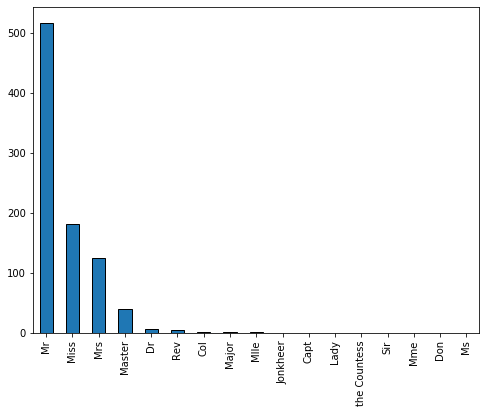

In [38]:
# Create plot
plt.figure(figsize=(8,6))
train.Title.value_counts().plot(kind="bar");

In [39]:
title_list_to_check = ["Rev", "Mlle", "Mme", "Jonkheer", "Dr","Master"]

In [40]:
element_dict = {}

def find_index(ser, ele_list):
    """
    A function find element and their indexes in a series.
    """
    for item in ele_list:
        # indices = [i for i, x in enumerate(ser) if x ==item]
        element_dict[item] = [i for i, x in enumerate(ser) if x ==item]
    return element_dict

In [41]:
find_err = find_index(title_series, title_list_to_check)

In [42]:
my_list = find_err["Dr"]

for index in my_list:
    print(train.Name[index])

Minahan, Dr. William Edward
Moraweck, Dr. Ernest
Pain, Dr. Alfred
Stahelin-Maeglin, Dr. Max
Frauenthal, Dr. Henry William
Brewe, Dr. Arthur Jackson
Leader, Dr. Alice (Farnham)


In [43]:
# check how to class 'Mme'
train.Name[369]

'Aubart, Mme. Leontine Pauline'

In [44]:
train[train.Name == train.Name[369]]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
369,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3,C,Mme


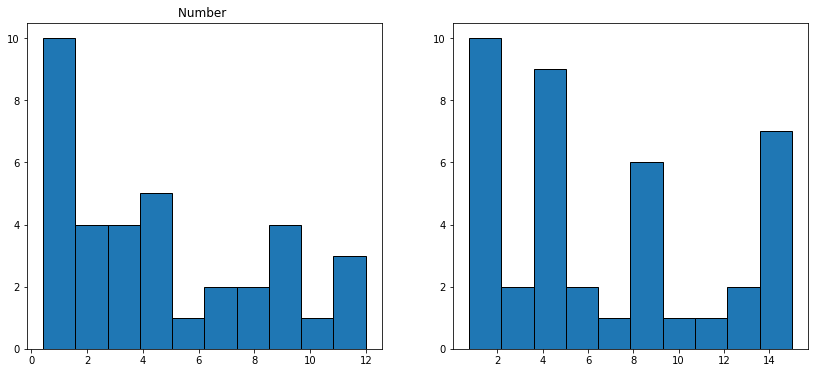

In [45]:
# Plot the age frequency for boy under 16
master = train[train.Title =="Master"]
master = master.dropna()

miss = train[train.Title == "Miss"]
miss = miss.dropna()
miss_under16 = miss[miss["Age"] < 16]

fig, axes = plt.subplots(1,2, figsize=(14,6))

# Plot for boys under 16
axes[0].hist(master["Age"])
# Add labels and title
axes[0].set(title="Number ")

# Plot for girls under 16
axes[1].hist(miss_under16["Age"]);

In [46]:
miss_under16.Age.mean()

6.853658536585366

In [47]:
# How many boys and girls
len(miss_under16["Age"]), len(master["Age"])

(41, 36)

In [48]:
train = train.replace({"Title": {796: "female"}})

   1. looks like we can class "Rev" title as male
   2. Abbreviation "Mlle" in France means unmarried young women
   3. Abbreviation "Mme" means madam(an elderly woman)
   4. "Jonkheer"- means youn lord from Dutch so we class is as male
   5. In "Dr" title there is one women - we need to change it
   6. "Master" title means male boy between 0 and 12. There is 41 of them
   7. In "Miss" column there is 36 girls under 16

* Let's create new column "Title" with abbreviations and map it as Mr, Mrs, Miss

In [49]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [50]:
train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [51]:
def replace_titles(df):
    """
    A function which map title column
    """
    title = df["Title"]
    
    if title in ["Mr","Don", "Rev","Major","Sir","Col","Capt","Jonkheer"]:
        return "Mr"
    elif title in ["Mrs","Lady","Mlle","Mme","the Countess","Ms"]:
        return "Mrs"
    elif title == "Dr":
        if df["Sex"] == "male":
            return "Mr"
        else:
            return "Mrs"
    else:
        return title

In [52]:
train.Title = train.apply(replace_titles, axis=1)

In [54]:
train.Title.value_counts()

Mr        537
Miss      182
Mrs       132
Master     40
Name: Title, dtype: int64

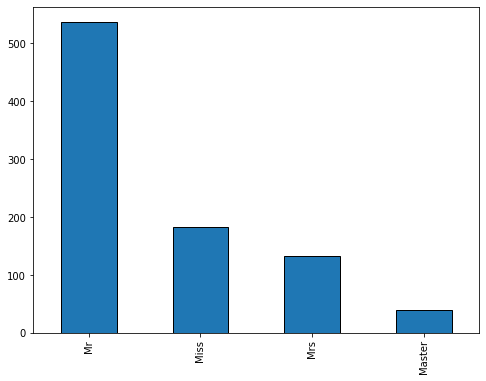

In [55]:
# Check Title column again
plt.figure(figsize=(8,6))
train.Title.value_counts().plot(kind="bar");

In [56]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [57]:
train.Title.value_counts()

Mr        537
Miss      182
Mrs       132
Master     40
Name: Title, dtype: int64

In [58]:
182+131+1

314

In [59]:
uniq = train.Title.unique()

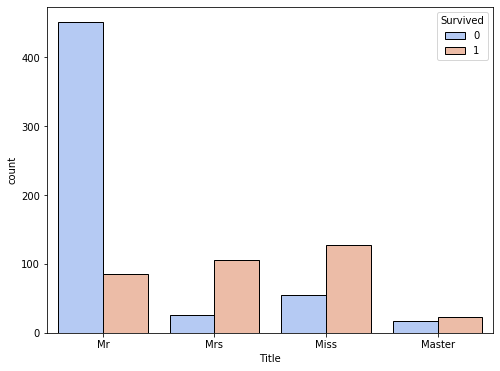

In [60]:
plt.figure(figsize=(8,6))
sns.countplot("Title", data=train, hue="Survived", palette="coolwarm")

As we finished with name column I'll remove it from our dataset

In [61]:
train = train.drop("Name", axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr


### Sex column

In [62]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [63]:
from collections import Counter

d = Counter(train.Sex)

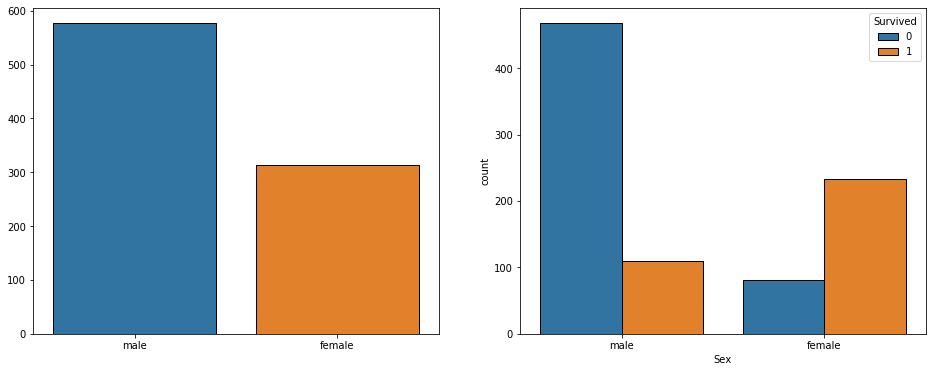

In [64]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.barplot(x=list(d.keys()), y=list(d.values()))

plt.subplot(1,2,2)
sns.countplot("Sex", data=train, hue="Survived")

#### Age group less 16

In [65]:
child_df = train[train["Age"] < 16]

In [66]:
len(child_df)

83

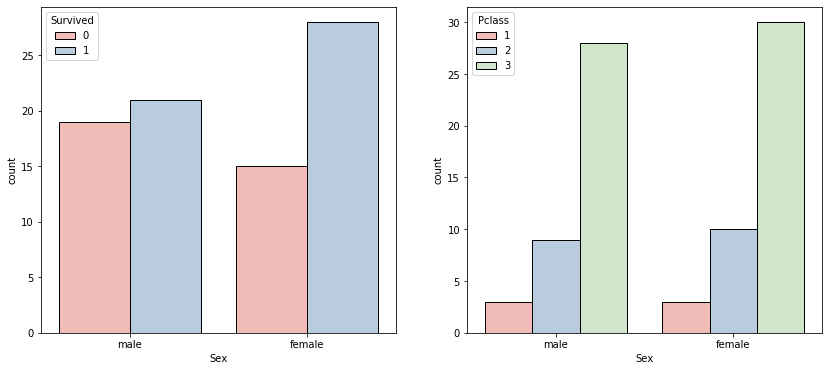

In [67]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot("Sex", data=child_df, hue="Survived", palette="Pastel1")

plt.subplot(1,2,2)
sns.countplot("Sex", data=child_df, hue="Pclass", palette="Pastel1");

* we can create another category in Sex column as child. There is 83 people under 16 but first we have to deal with missing values in Age column

In [68]:
children_procent = len(child_df) / len(train) * 100

print(f"Procent of children on the ship: {children_procent:.2f}%")

Procent of children on the ship: 9.32%


In [69]:
train["Sex"].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

### Age column

Let's create some visualization

[Text(0.5, 1.0, 'Age Distribution')]

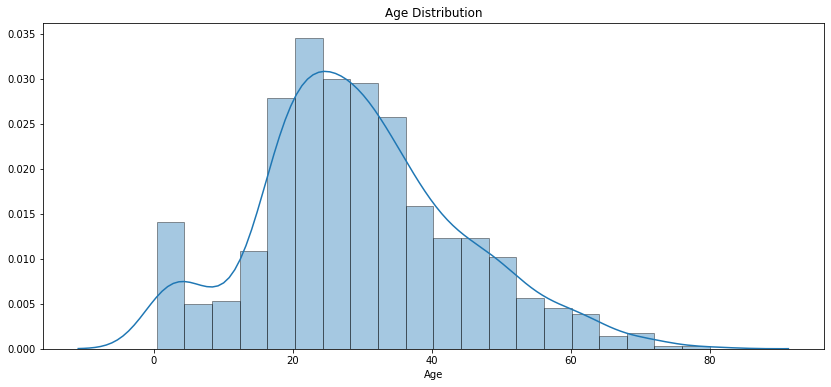

In [70]:
fig, ax = plt.subplots(figsize=(14,6))

ax = sns.distplot(train["Age"])

ax.set(title="Age Distribution")

In [71]:
train.Age.isnull().sum()

177

In [72]:
bool1 = train["Age"].isna()

# df1 = train[train.isna().any(axis=1)]

In [73]:
# Null values in age column grouped by title with survived=1
train[bool1].groupby("Title").sum()

,Survived,Pclass,Age,SibSp,Parch,Fare
Title,,,,,,
Master,2,12,0.0,13,5,125.5083
Miss,22,104,0.0,41,14,735.7877
Mr,14,309,0.0,36,8,2248.9954
Mrs,14,35,0.0,10,5,811.7749


In [74]:
# DataFrame contains all null values by Age
all_age_null = train[bool1]


all_age_null["Survived"].value_counts()

0    125
1     52
Name: Survived, dtype: int64

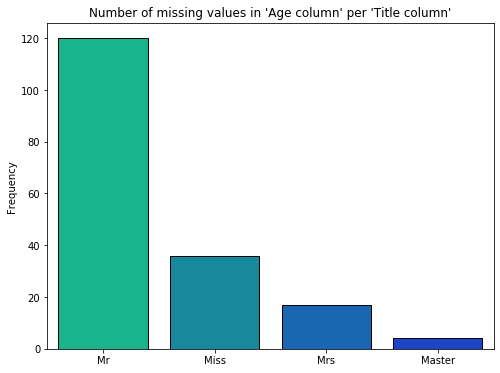

In [75]:
# Let's visualize missing values in age column
age_by_title = all_age_null.aggregate({"Title": ["value_counts"]})
age_by_title = age_by_title["Title"]
# Data for barplot
name_index = age_by_title.index
values = age_by_title.values
values = values.reshape(1,4)

# Create figure
fig, ax = plt.subplots(figsize=(8,6))

# Draw a plot
ax = sns.barplot(x=name_index, y=values[0], palette="winter_r")

# Add title and y label
ax.set(title="Number of missing values in 'Age column' per 'Title column'",
       ylabel="Frequency");

In [76]:
age_by_title

,value_counts
Mr,120
Miss,36
Mrs,17
Master,4


Now we've got this table we can create function to fill missing data in "Age" column with their median. 

After that we'll change "Sex column" into 3 categories:
    * Female
    * Male
    * child

In [77]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr


In [78]:
# mean for men and women above 16
adults_mean_df = train[train["Age"] > 16]
adults_mean = adults_mean_df["Age"].mean()

In [79]:
master_mean = master["Age"].mean()
miss_16_mean = miss_under16["Age"].mean()

print(f"The mean age for adults is: {adults_mean:.2f}")
print(f"The mean age for boys is: {master_mean:.2f}")
print(f"The mean age for girls is: {miss_16_mean:.2f}")

The mean age for adults is: 33.23
The mean age for boys is: 4.57
The mean age for girls is: 6.85


* Let's replace missing values in Age column

In [80]:
# Fill null value with their means
# Could be a better method but I am still learning
title_list = ["Master"]
train.Age = np.where(train.Title.isin(title_list), train.Age.fillna(master_mean), train.Age)

In [81]:
title_list2 = ["Miss"]
train.Age = np.where(train.Title.isin(title_list2), train.Age.fillna(miss_16_mean), train.Age)

In [82]:
title_list3 = ["Mrs", "Mr"]
train.Age = np.where(train.Title.isin(title_list3), train.Age.fillna(adults_mean), train.Age)

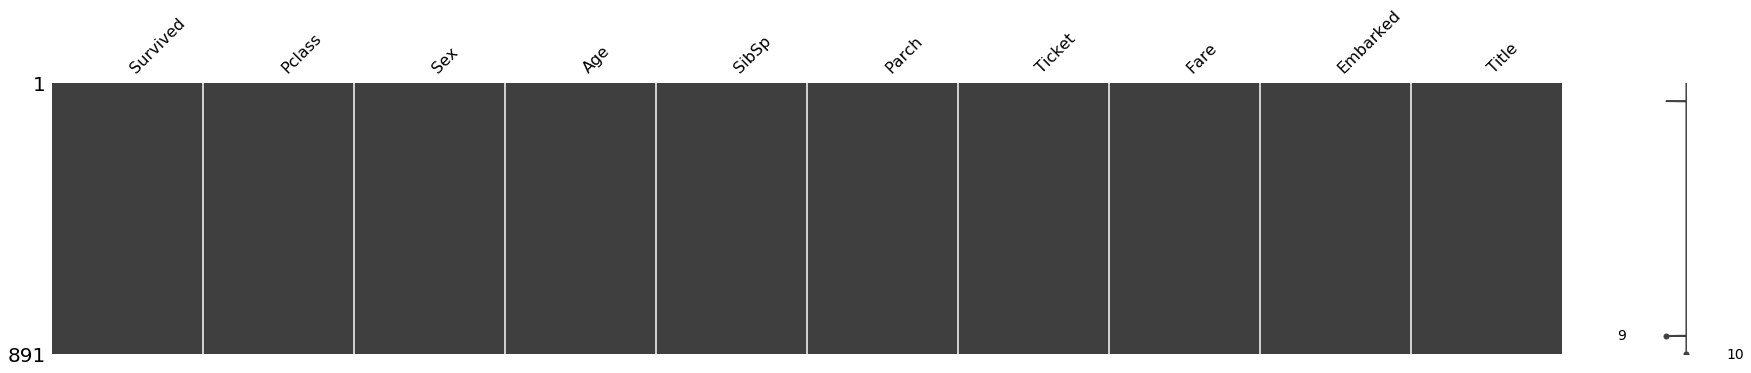

In [83]:
# Plot graphic of missing values
missingno.matrix(train, figsize=(30,5))

### Gender  "Sex" column

In [84]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr


I'll create another column call "Person" from "Sex" column and make three categories:
* male
* femal
* child

In [85]:
def male_female_child(passenger):
    """
    Function add another category 'child'
    """
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return sex

In [86]:
train["Person"] = train[["Age","Sex"]].apply(male_female_child, axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Person
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,male
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,female
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,female
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs,female
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr,male


In [87]:
# Let's drop Sex column
train = train.drop(["Sex"], axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Person
0,0,3,22.0,1,0,A/5 21171,7.2500,S,Mr,male
1,1,1,38.0,1,0,PC 17599,71.2833,C,Mrs,female
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,female
3,1,1,35.0,1,0,113803,53.1000,S,Mrs,female
4,0,3,35.0,0,0,373450,8.0500,S,Mr,male


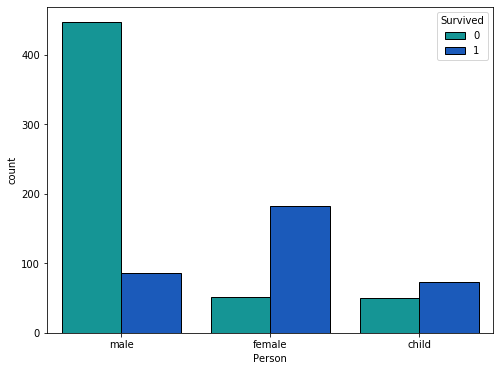

In [88]:
# Create plot for Person column
fig, ax = plt.subplots(figsize=(8,6))

ax = sns.countplot("Person", data=train, hue="Survived", palette="winter_r")

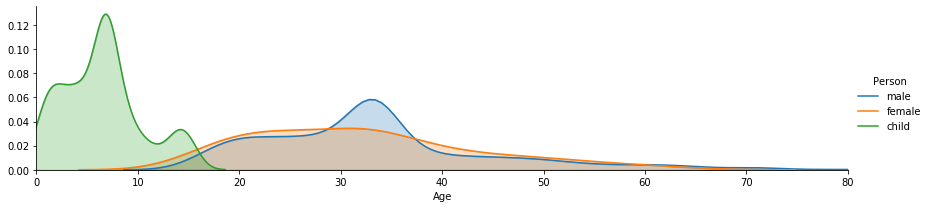

In [89]:
fig = sns.FacetGrid(train,hue='Person',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = train['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend();

### Sibsp  and Parch columns

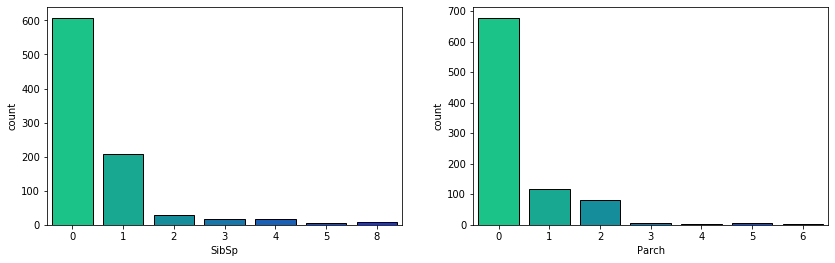

In [90]:
# Create plot for Sibsp and Parch
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.countplot(train["SibSp"], palette="winter_r")

plt.subplot(1,2,2)
sns.countplot(train["Parch"], palette="winter_r")

In [91]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Person
0,0,3,22.0,1,0,A/5 21171,7.2500,S,Mr,male
1,1,1,38.0,1,0,PC 17599,71.2833,C,Mrs,female
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,female
3,1,1,35.0,1,0,113803,53.1000,S,Mrs,female
4,0,3,35.0,0,0,373450,8.0500,S,Mr,male


### Ticket column

In [92]:
train["Ticket"].value_counts()

1601               7
CA. 2343           7
347082             7
CA 2144            6
3101295            6
                  ..
113043             1
27849              1
370371             1
SOTON/OQ 392076    1
11769              1
Name: Ticket, Length: 681, dtype: int64

In [93]:
train["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

I'll drop this feature from further analysis

In [94]:
train = train.drop(["Ticket"], axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Person
0,0,3,22.0,1,0,7.2500,S,Mr,male
1,1,1,38.0,1,0,71.2833,C,Mrs,female
2,1,3,26.0,0,0,7.9250,S,Miss,female
3,1,1,35.0,1,0,53.1000,S,Mrs,female
4,0,3,35.0,0,0,8.0500,S,Mr,male


## Create checkpoint

In [95]:
train_df = train.copy()

### Fare column

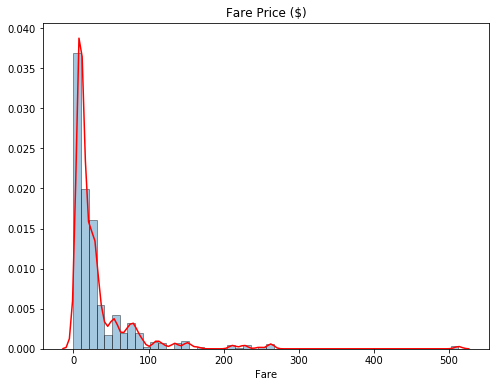

In [96]:
plt.figure(figsize=(8,6))
sns.distplot(train_df["Fare"],kde_kws={"color": "r"})
plt.title("Fare Price ($)");

In [97]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [98]:
train_df.Fare.max()

512.3292

Text(0.5, 1.0, 'Ticket Price per Age')

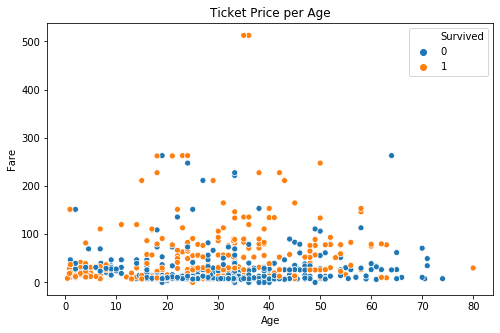

In [99]:
plt.figure(figsize=(8,5))

sns.scatterplot(x="Age", y="Fare", data=train_df, hue="Survived")
plt.title("Ticket Price per Age")

In [100]:
# List of people who paid 500+ for a ticket
data1[data1["Fare"] > 300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


### Embarked column

In [101]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Person
0,0,3,22.0,1,0,7.2500,S,Mr,male
1,1,1,38.0,1,0,71.2833,C,Mrs,female
2,1,3,26.0,0,0,7.9250,S,Miss,female
3,1,1,35.0,1,0,53.1000,S,Mrs,female
4,0,3,35.0,0,0,8.0500,S,Mr,male


In [102]:
train_df["Embarked"].isna().sum()

2

In [103]:
# Names of people where missing data in embarked column
data1[data1["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


* Miss Amelle embarked from Southampton
* Mrs. George Nelson embarked from Southampton

>Fill missing values in Embarked column

In [104]:
train_df["Embarked"] = train_df["Embarked"].fillna("S")
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Person
0,0,3,22.000000,1,0,7.2500,S,Mr,male
1,1,1,38.000000,1,0,71.2833,C,Mrs,female
2,1,3,26.000000,0,0,7.9250,S,Miss,female
3,1,1,35.000000,1,0,53.1000,S,Mrs,female
4,0,3,35.000000,0,0,8.0500,S,Mr,male
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,S,Mr,male
887,1,1,19.000000,0,0,30.0000,S,Miss,female
888,0,3,6.853659,1,2,23.4500,S,Miss,child
889,1,1,26.000000,0,0,30.0000,C,Mr,male


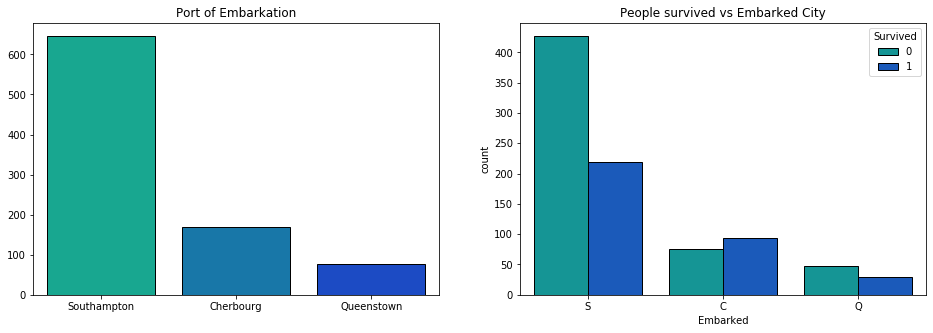

In [105]:
# Make some visualizations
embarked_count = train_df.Embarked.value_counts()

embarked_dict = {"Southampton": embarked_count[0],
                 "Cherbourg": embarked_count[1],
                 "Queenstown": embarked_count[2]}

# Ceate plot 1
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.barplot(x=list(embarked_dict.keys()),
            y=list(embarked_dict.values()),
            palette="winter_r");
# Add title for plot 1
plt.title("Port of Embarkation")

# Create plot 2
plt.subplot(1,2,2)
sns.countplot("Embarked", 
              data=train_df, 
              hue="Survived", 
              palette="winter_r")
plt.title("People survived vs Embarked City");

In [106]:
# Check for missing values before making dummies variables

In [107]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Person
0,0,3,22.0,1,0,7.2500,S,Mr,male
1,1,1,38.0,1,0,71.2833,C,Mrs,female
2,1,3,26.0,0,0,7.9250,S,Miss,female
3,1,1,35.0,1,0,53.1000,S,Mrs,female
4,0,3,35.0,0,0,8.0500,S,Mr,male


In [108]:
train_df.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
Person      0
dtype: int64

In [109]:
train_df.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Title        object
Person       object
dtype: object

## Checkpoint

In [110]:
train_df_prep = train_df.copy()

In [111]:
# Export transformed dataset into the file
train_df_prep.to_csv("data/train_no_missing_values.csv", index=False)

## Let's create some dummy variables for our models

Now I have dataframe ready. We can encode the features so they're ready to be used for machine learning models.

In [112]:
train_df_prep.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Person
0,0,3,22.0,1,0,7.2500,S,Mr,male
1,1,1,38.0,1,0,71.2833,C,Mrs,female
2,1,3,26.0,0,0,7.9250,S,Miss,female
3,1,1,35.0,1,0,53.1000,S,Mrs,female
4,0,3,35.0,0,0,8.0500,S,Mr,male


In [113]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer

In [114]:
train_df_con = train_df_prep.apply(LabelEncoder().fit_transform)
train_df_con.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Person
0,0,2,30,1,0,18,2,2,2
1,1,0,54,1,0,207,0,3,1
2,1,2,36,0,0,41,2,1,1
3,1,0,50,1,0,189,2,3,1
4,0,2,50,0,0,43,2,2,2


## Let's split into X, y train

In [115]:
# Train data
X_train = train_df_con.drop(["Survived"], axis=1)
# Labels
y_train = train_df_con["Survived"]

In [116]:
X_train.shape, y_train.shape

((891, 8), (891,))

## Import models I am going to use
1. Logistic Regression
2. K-Nearest Neighbours
3. Gaussian Naive Bayes
4. Linear SVC
5. Random Forests Classifier
6. Decision Tree Classifier
7. Gradient Boost Classifier
8. CatBoost

In [117]:
# Let's create a function to deal with our models
def machine_algorithm(ml_model, X_train, y_train, cv):
    
    # Run model only one time
    model = ml_model.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) *100,2)
    
    # for cross-validation
    train_pred = model_selection.cross_val_predict(ml_model,
                                                   X_train,
                                                   y_train,
                                                   n_jobs=-1,
                                                   cv=cv)
    cv_acc = round(metrics.accuracy_score(y_train,
                                          train_pred)*100, 2)
    return train_pred, acc, cv_acc

**1. Logistic Regression**

In [118]:
%%time
train_pred, lr_acc, lr_cv_acc = machine_algorithm(LogisticRegression(),
                                                        X_train,
                                                        y_train,
                                                        10)

print(f"Accuracy: {lr_acc}%")
print(f"Accuracy CV 10-fold: {lr_cv_acc}%")
print("\n")

Accuracy: 82.04%
Accuracy CV 10-fold: 80.47%


CPU times: user 88.1 ms, sys: 48.1 ms, total: 136 ms
Wall time: 1.32 s


**2. KNeighborsClassifier**

In [119]:
%%time
knn_pred, knn_acc, knn_cv_acc = machine_algorithm(KNeighborsClassifier(),
                                                          X_train,
                                                          y_train,
                                                          10)

print(f"Accuracy: {knn_acc}%")
print(f"Accuracy CV 10-fold: {knn_cv_acc}%")
print("\n")

Accuracy: 78.23%
Accuracy CV 10-fold: 69.7%


CPU times: user 71.8 ms, sys: 4.51 ms, total: 76.3 ms
Wall time: 160 ms


**3. Gaussian Naive Bayes**

In [120]:
%%time
gnb_pred, gnb_acc, gnb_cv_acc = machine_algorithm(GaussianNB(),
                                                              X_train,
                                                              y_train,
                                                              10)
print(f"Accuracy: {gnb_acc}%")
print(f"Accuracy CV 10-fold: {gnb_cv_acc}%")
print("\n")

Accuracy: 80.81%
Accuracy CV 10-fold: 79.01%


CPU times: user 36.8 ms, sys: 3.8 ms, total: 40.6 ms
Wall time: 54.7 ms


**4. Linear SVC**

In [121]:
%%time
svc_pred, svc_acc, svc_cv_acc = machine_algorithm(LinearSVC(),
                                                  X_train,
                                                  y_train,
                                                  10)
 
print(f"Accuracy: {svc_acc}%")
print(f"Accuracy CV 10-fold: {svc_cv_acc}%")                                                           

Accuracy: 65.88%
Accuracy CV 10-fold: 67.68%
CPU times: user 98.3 ms, sys: 7.11 ms, total: 105 ms
Wall time: 230 ms


**5. Random Forest Classifier**

In [122]:
rfc_pred, rfc_acc, rfc_cv_acc = machine_algorithm(RandomForestClassifier(),
                                                              X_train,
                                                              y_train,
                                                              10)

print(f"Accuracy: {rfc_acc}%")
print(f"Accuracy CV 10-fold: {rfc_cv_acc}%")

Accuracy: 98.09%
Accuracy CV 10-fold: 81.48%


**6. Decision Tree Classifier**

In [123]:
%%time
dtc_pred, dtc_acc, dtc_cv_acc = machine_algorithm(DecisionTreeClassifier(),
                                                              X_train,
                                                              y_train,
                                                              10)

print(f"Accuracy: {dtc_acc}%")
print(f"Accuracy CV 10-fold: {dtc_cv_acc}%")

Accuracy: 98.2%
Accuracy CV 10-fold: 78.56%
CPU times: user 47.6 ms, sys: 206 µs, total: 47.8 ms
Wall time: 66.6 ms


**7. Gradient Boost Classifier**

In [124]:
%%time
gbc_pred, gbc_acc, gbc_cv_acc = machine_algorithm(GradientBoostingClassifier(),
                                                  X_train,
                                                  y_train,
                                                  10)
print(f"Accuracy: {gbc_acc}%")
print(f"Accuracy CV 10-fold: {gbc_cv_acc}%")

Accuracy: 90.12%
Accuracy CV 10-fold: 82.72%
CPU times: user 192 ms, sys: 4.45 ms, total: 197 ms
Wall time: 598 ms


## Let' do it for CatBoost

In [125]:
%%time
cat_feature = np.where(X_train.dtypes !=np.float)[0]

train_pool = Pool(X_train, y_train, cat_feature)

# Instatiate model
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=["Accuracy"],
                                    loss_function="Logloss")
# Fit the model
catboost_model.fit(train_pool, plot=True)

# Accuracy for catboost
cat_acc = round(catboost_model.score(X_train, y_train)*100,2)
print(f"Accuracy: {cat_acc}%")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009807
0:	learn: 0.6877307	total: 96.4ms	remaining: 1m 36s
1:	learn: 0.6819544	total: 102ms	remaining: 51.1s
2:	learn: 0.6758826	total: 107ms	remaining: 35.6s
3:	learn: 0.6709716	total: 109ms	remaining: 27.2s
4:	learn: 0.6650283	total: 113ms	remaining: 22.4s
5:	learn: 0.6593035	total: 117ms	remaining: 19.3s
6:	learn: 0.6533617	total: 121ms	remaining: 17.1s
7:	learn: 0.6485415	total: 125ms	remaining: 15.5s
8:	learn: 0.6430774	total: 129ms	remaining: 14.2s
9:	learn: 0.6381258	total: 132ms	remaining: 13.1s
10:	learn: 0.6333019	total: 135ms	remaining: 12.1s
11:	learn: 0.6283670	total: 137ms	remaining: 11.3s
12:	learn: 0.6234754	total: 143ms	remaining: 10.9s
13:	learn: 0.6187975	total: 147ms	remaining: 10.3s
14:	learn: 0.6147398	total: 150ms	remaining: 9.84s
15:	learn: 0.6097532	total: 154ms	remaining: 9.46s
16:	learn: 0.6050715	total: 158ms	remaining: 9.11s
17:	learn: 0.6011106	total: 160ms	remaining: 8.71s
18:	learn: 0.5974888	total: 162ms	remaining: 8.34s
19:	learn

220:	learn: 0.3702282	total: 923ms	remaining: 3.25s
221:	learn: 0.3701007	total: 925ms	remaining: 3.24s
222:	learn: 0.3697324	total: 928ms	remaining: 3.23s
223:	learn: 0.3692928	total: 930ms	remaining: 3.22s
224:	learn: 0.3689534	total: 933ms	remaining: 3.21s
225:	learn: 0.3686264	total: 936ms	remaining: 3.21s
226:	learn: 0.3684668	total: 938ms	remaining: 3.19s
227:	learn: 0.3680679	total: 941ms	remaining: 3.19s
228:	learn: 0.3678958	total: 943ms	remaining: 3.17s
229:	learn: 0.3676329	total: 946ms	remaining: 3.17s
230:	learn: 0.3670074	total: 948ms	remaining: 3.16s
231:	learn: 0.3668616	total: 951ms	remaining: 3.15s
232:	learn: 0.3666282	total: 954ms	remaining: 3.14s
233:	learn: 0.3665010	total: 956ms	remaining: 3.13s
234:	learn: 0.3662262	total: 959ms	remaining: 3.12s
235:	learn: 0.3660888	total: 961ms	remaining: 3.11s
236:	learn: 0.3657015	total: 965ms	remaining: 3.11s
237:	learn: 0.3655855	total: 969ms	remaining: 3.1s
238:	learn: 0.3652361	total: 972ms	remaining: 3.09s
239:	learn: 0

389:	learn: 0.3349986	total: 1.5s	remaining: 2.35s
390:	learn: 0.3345020	total: 1.51s	remaining: 2.35s
391:	learn: 0.3342506	total: 1.51s	remaining: 2.35s
392:	learn: 0.3341417	total: 1.52s	remaining: 2.34s
393:	learn: 0.3338794	total: 1.52s	remaining: 2.34s
394:	learn: 0.3335933	total: 1.52s	remaining: 2.33s
395:	learn: 0.3334038	total: 1.53s	remaining: 2.33s
396:	learn: 0.3330940	total: 1.53s	remaining: 2.32s
397:	learn: 0.3329013	total: 1.53s	remaining: 2.32s
398:	learn: 0.3325858	total: 1.54s	remaining: 2.31s
399:	learn: 0.3323703	total: 1.54s	remaining: 2.31s
400:	learn: 0.3320769	total: 1.54s	remaining: 2.3s
401:	learn: 0.3319617	total: 1.54s	remaining: 2.3s
402:	learn: 0.3319063	total: 1.55s	remaining: 2.29s
403:	learn: 0.3318327	total: 1.55s	remaining: 2.29s
404:	learn: 0.3316520	total: 1.55s	remaining: 2.28s
405:	learn: 0.3315474	total: 1.56s	remaining: 2.28s
406:	learn: 0.3314132	total: 1.56s	remaining: 2.27s
407:	learn: 0.3312871	total: 1.56s	remaining: 2.27s
408:	learn: 0.3

565:	learn: 0.3081527	total: 2.08s	remaining: 1.6s
566:	learn: 0.3079568	total: 2.09s	remaining: 1.59s
567:	learn: 0.3077911	total: 2.09s	remaining: 1.59s
568:	learn: 0.3076016	total: 2.1s	remaining: 1.59s
569:	learn: 0.3075727	total: 2.1s	remaining: 1.58s
570:	learn: 0.3075139	total: 2.1s	remaining: 1.58s
571:	learn: 0.3072468	total: 2.11s	remaining: 1.58s
572:	learn: 0.3071346	total: 2.11s	remaining: 1.57s
573:	learn: 0.3069848	total: 2.12s	remaining: 1.57s
574:	learn: 0.3067401	total: 2.12s	remaining: 1.57s
575:	learn: 0.3067079	total: 2.13s	remaining: 1.56s
576:	learn: 0.3065385	total: 2.13s	remaining: 1.56s
577:	learn: 0.3064712	total: 2.13s	remaining: 1.56s
578:	learn: 0.3063465	total: 2.14s	remaining: 1.55s
579:	learn: 0.3061301	total: 2.14s	remaining: 1.55s
580:	learn: 0.3059357	total: 2.15s	remaining: 1.55s
581:	learn: 0.3057958	total: 2.15s	remaining: 1.55s
582:	learn: 0.3056462	total: 2.16s	remaining: 1.54s
583:	learn: 0.3056156	total: 2.16s	remaining: 1.54s
584:	learn: 0.30

746:	learn: 0.2854133	total: 2.67s	remaining: 903ms
747:	learn: 0.2852177	total: 2.67s	remaining: 900ms
748:	learn: 0.2850084	total: 2.67s	remaining: 896ms
749:	learn: 0.2849426	total: 2.67s	remaining: 892ms
750:	learn: 0.2846506	total: 2.69s	remaining: 890ms
751:	learn: 0.2845713	total: 2.69s	remaining: 887ms
752:	learn: 0.2845329	total: 2.69s	remaining: 884ms
753:	learn: 0.2844917	total: 2.7s	remaining: 880ms
754:	learn: 0.2843990	total: 2.7s	remaining: 877ms
755:	learn: 0.2841935	total: 2.7s	remaining: 873ms
756:	learn: 0.2839998	total: 2.71s	remaining: 869ms
757:	learn: 0.2839322	total: 2.71s	remaining: 865ms
758:	learn: 0.2838799	total: 2.71s	remaining: 862ms
759:	learn: 0.2837782	total: 2.72s	remaining: 858ms
760:	learn: 0.2836462	total: 2.72s	remaining: 854ms
761:	learn: 0.2835577	total: 2.72s	remaining: 850ms
762:	learn: 0.2835308	total: 2.73s	remaining: 846ms
763:	learn: 0.2834254	total: 2.73s	remaining: 843ms
764:	learn: 0.2833532	total: 2.73s	remaining: 839ms
765:	learn: 0.2

926:	learn: 0.2659451	total: 3.25s	remaining: 256ms
927:	learn: 0.2659060	total: 3.25s	remaining: 252ms
928:	learn: 0.2657411	total: 3.25s	remaining: 248ms
929:	learn: 0.2656031	total: 3.26s	remaining: 245ms
930:	learn: 0.2655475	total: 3.26s	remaining: 242ms
931:	learn: 0.2654843	total: 3.27s	remaining: 239ms
932:	learn: 0.2653010	total: 3.28s	remaining: 235ms
933:	learn: 0.2652288	total: 3.28s	remaining: 232ms
934:	learn: 0.2651319	total: 3.29s	remaining: 228ms
935:	learn: 0.2650696	total: 3.29s	remaining: 225ms
936:	learn: 0.2649283	total: 3.29s	remaining: 222ms
937:	learn: 0.2647173	total: 3.3s	remaining: 218ms
938:	learn: 0.2646437	total: 3.3s	remaining: 215ms
939:	learn: 0.2645087	total: 3.31s	remaining: 211ms
940:	learn: 0.2644132	total: 3.31s	remaining: 208ms
941:	learn: 0.2643686	total: 3.32s	remaining: 204ms
942:	learn: 0.2643362	total: 3.32s	remaining: 201ms
943:	learn: 0.2643161	total: 3.33s	remaining: 197ms
944:	learn: 0.2641895	total: 3.33s	remaining: 194ms
945:	learn: 0.

### Let's do it for cross-validation

In [126]:
%%time
# Set params for cross-validation same as for initial model
cv_params = catboost_model.get_params()

# Run Cross-validation for catboost
cv_catboost = cv(train_pool, 
              cv_params,
              fold_count=10,
              plot=False)

# Catboost result save later into dataframe 
cat_cv_acc = round(np.max(cv_catboost["test-Accuracy-mean"]) *100 ,2)

0:	learn: 0.6741460	test: 0.6741996	best: 0.6741996 (0)	total: 3.45s	remaining: 57m 25s
1:	learn: 0.6568605	test: 0.6570117	best: 0.6570117 (1)	total: 7.33s	remaining: 1h 59s
2:	learn: 0.6398822	test: 0.6405194	best: 0.6405194 (2)	total: 11.7s	remaining: 1h 4m 43s
3:	learn: 0.6259565	test: 0.6270248	best: 0.6270248 (3)	total: 16.2s	remaining: 1h 7m 21s
4:	learn: 0.6121017	test: 0.6129238	best: 0.6129238 (4)	total: 19.2s	remaining: 1h 3m 36s
5:	learn: 0.5992108	test: 0.6006437	best: 0.6006437 (5)	total: 23.3s	remaining: 1h 4m 14s
6:	learn: 0.5865447	test: 0.5880235	best: 0.5880235 (6)	total: 27.3s	remaining: 1h 4m 32s
7:	learn: 0.5752392	test: 0.5769704	best: 0.5769704 (7)	total: 32.5s	remaining: 1h 7m 12s
8:	learn: 0.5651790	test: 0.5672629	best: 0.5672629 (8)	total: 37.2s	remaining: 1h 8m 17s
9:	learn: 0.5554608	test: 0.5578074	best: 0.5578074 (9)	total: 41.3s	remaining: 1h 8m 11s
10:	learn: 0.5457063	test: 0.5486372	best: 0.5486372 (10)	total: 45.3s	remaining: 1h 7m 57s
11:	learn: 0.

89:	learn: 0.3585694	test: 0.4025659	best: 0.4025659 (89)	total: 6m 36s	remaining: 1h 6m 50s
90:	learn: 0.3577115	test: 0.4025378	best: 0.4025378 (90)	total: 6m 40s	remaining: 1h 6m 40s
91:	learn: 0.3569574	test: 0.4023594	best: 0.4023594 (91)	total: 6m 44s	remaining: 1h 6m 32s
92:	learn: 0.3564057	test: 0.4022008	best: 0.4022008 (92)	total: 6m 49s	remaining: 1h 6m 31s
93:	learn: 0.3559044	test: 0.4023781	best: 0.4022008 (92)	total: 6m 53s	remaining: 1h 6m 29s
94:	learn: 0.3553186	test: 0.4023130	best: 0.4022008 (92)	total: 6m 58s	remaining: 1h 6m 26s
95:	learn: 0.3546775	test: 0.4020740	best: 0.4020740 (95)	total: 7m 3s	remaining: 1h 6m 27s
96:	learn: 0.3538033	test: 0.4017035	best: 0.4017035 (96)	total: 7m 8s	remaining: 1h 6m 30s
97:	learn: 0.3531600	test: 0.4021065	best: 0.4017035 (96)	total: 7m 13s	remaining: 1h 6m 27s
98:	learn: 0.3526316	test: 0.4019431	best: 0.4017035 (96)	total: 7m 18s	remaining: 1h 6m 31s
99:	learn: 0.3522072	test: 0.4020186	best: 0.4017035 (96)	total: 7m 23s	

176:	learn: 0.3147951	test: 0.4018329	best: 0.3998909 (133)	total: 12m 53s	remaining: 59m 57s
177:	learn: 0.3143076	test: 0.4017517	best: 0.3998909 (133)	total: 12m 57s	remaining: 59m 52s
178:	learn: 0.3139096	test: 0.4016699	best: 0.3998909 (133)	total: 13m 2s	remaining: 59m 47s
179:	learn: 0.3134307	test: 0.4016735	best: 0.3998909 (133)	total: 13m 6s	remaining: 59m 40s
180:	learn: 0.3129739	test: 0.4019632	best: 0.3998909 (133)	total: 13m 10s	remaining: 59m 36s
181:	learn: 0.3124949	test: 0.4017306	best: 0.3998909 (133)	total: 13m 15s	remaining: 59m 34s
182:	learn: 0.3120469	test: 0.4016076	best: 0.3998909 (133)	total: 13m 19s	remaining: 59m 29s
183:	learn: 0.3116975	test: 0.4014750	best: 0.3998909 (133)	total: 13m 23s	remaining: 59m 24s
184:	learn: 0.3113648	test: 0.4014762	best: 0.3998909 (133)	total: 13m 28s	remaining: 59m 19s
185:	learn: 0.3109186	test: 0.4015150	best: 0.3998909 (133)	total: 13m 31s	remaining: 59m 12s
186:	learn: 0.3106580	test: 0.4013785	best: 0.3998909 (133)	to

264:	learn: 0.2815022	test: 0.4024452	best: 0.3998909 (133)	total: 18m 57s	remaining: 52m 34s
265:	learn: 0.2812466	test: 0.4024491	best: 0.3998909 (133)	total: 19m 1s	remaining: 52m 29s
266:	learn: 0.2809900	test: 0.4024760	best: 0.3998909 (133)	total: 19m 7s	remaining: 52m 28s
267:	learn: 0.2806328	test: 0.4025018	best: 0.3998909 (133)	total: 19m 11s	remaining: 52m 25s
268:	learn: 0.2803120	test: 0.4024943	best: 0.3998909 (133)	total: 19m 16s	remaining: 52m 21s
269:	learn: 0.2799418	test: 0.4022638	best: 0.3998909 (133)	total: 19m 21s	remaining: 52m 19s
270:	learn: 0.2795961	test: 0.4022788	best: 0.3998909 (133)	total: 19m 25s	remaining: 52m 14s
271:	learn: 0.2792655	test: 0.4021894	best: 0.3998909 (133)	total: 19m 29s	remaining: 52m 9s
272:	learn: 0.2789300	test: 0.4023910	best: 0.3998909 (133)	total: 19m 33s	remaining: 52m 4s
273:	learn: 0.2784488	test: 0.4022880	best: 0.3998909 (133)	total: 19m 37s	remaining: 51m 59s
274:	learn: 0.2781532	test: 0.4022105	best: 0.3998909 (133)	tota

352:	learn: 0.2542850	test: 0.4044598	best: 0.3998909 (133)	total: 26m 3s	remaining: 47m 45s
353:	learn: 0.2540424	test: 0.4044175	best: 0.3998909 (133)	total: 26m 9s	remaining: 47m 43s
354:	learn: 0.2537932	test: 0.4044861	best: 0.3998909 (133)	total: 26m 15s	remaining: 47m 43s
355:	learn: 0.2535600	test: 0.4045521	best: 0.3998909 (133)	total: 26m 23s	remaining: 47m 44s
356:	learn: 0.2533711	test: 0.4046161	best: 0.3998909 (133)	total: 26m 29s	remaining: 47m 42s
357:	learn: 0.2530867	test: 0.4046156	best: 0.3998909 (133)	total: 26m 36s	remaining: 47m 43s
358:	learn: 0.2528275	test: 0.4046020	best: 0.3998909 (133)	total: 26m 40s	remaining: 47m 38s
359:	learn: 0.2525041	test: 0.4045399	best: 0.3998909 (133)	total: 26m 46s	remaining: 47m 36s
360:	learn: 0.2522838	test: 0.4045475	best: 0.3998909 (133)	total: 26m 49s	remaining: 47m 28s
361:	learn: 0.2520517	test: 0.4045826	best: 0.3998909 (133)	total: 26m 53s	remaining: 47m 24s
362:	learn: 0.2517839	test: 0.4045944	best: 0.3998909 (133)	to

440:	learn: 0.2315754	test: 0.4070038	best: 0.3998909 (133)	total: 32m 47s	remaining: 41m 33s
441:	learn: 0.2313790	test: 0.4068854	best: 0.3998909 (133)	total: 32m 52s	remaining: 41m 30s
442:	learn: 0.2311023	test: 0.4070213	best: 0.3998909 (133)	total: 32m 57s	remaining: 41m 26s
443:	learn: 0.2308035	test: 0.4071346	best: 0.3998909 (133)	total: 33m 1s	remaining: 41m 21s
444:	learn: 0.2306016	test: 0.4070318	best: 0.3998909 (133)	total: 33m 7s	remaining: 41m 19s
445:	learn: 0.2303598	test: 0.4068805	best: 0.3998909 (133)	total: 33m 12s	remaining: 41m 14s
446:	learn: 0.2300431	test: 0.4069839	best: 0.3998909 (133)	total: 33m 16s	remaining: 41m 10s
447:	learn: 0.2295791	test: 0.4070322	best: 0.3998909 (133)	total: 33m 22s	remaining: 41m 7s
448:	learn: 0.2293701	test: 0.4071636	best: 0.3998909 (133)	total: 33m 27s	remaining: 41m 3s
449:	learn: 0.2291419	test: 0.4070905	best: 0.3998909 (133)	total: 33m 30s	remaining: 40m 57s
450:	learn: 0.2289239	test: 0.4073796	best: 0.3998909 (133)	tota

528:	learn: 0.2111869	test: 0.4123028	best: 0.3998909 (133)	total: 39m 7s	remaining: 34m 49s
529:	learn: 0.2109746	test: 0.4125940	best: 0.3998909 (133)	total: 39m 11s	remaining: 34m 45s
530:	learn: 0.2107954	test: 0.4126046	best: 0.3998909 (133)	total: 39m 16s	remaining: 34m 41s
531:	learn: 0.2106026	test: 0.4127687	best: 0.3998909 (133)	total: 39m 20s	remaining: 34m 36s
532:	learn: 0.2104105	test: 0.4128622	best: 0.3998909 (133)	total: 39m 26s	remaining: 34m 33s
533:	learn: 0.2102636	test: 0.4129110	best: 0.3998909 (133)	total: 39m 29s	remaining: 34m 27s
534:	learn: 0.2100906	test: 0.4128702	best: 0.3998909 (133)	total: 39m 33s	remaining: 34m 23s
535:	learn: 0.2097752	test: 0.4130313	best: 0.3998909 (133)	total: 39m 38s	remaining: 34m 18s
536:	learn: 0.2095591	test: 0.4131767	best: 0.3998909 (133)	total: 39m 41s	remaining: 34m 13s
537:	learn: 0.2093822	test: 0.4131677	best: 0.3998909 (133)	total: 39m 45s	remaining: 34m 8s
538:	learn: 0.2091314	test: 0.4132146	best: 0.3998909 (133)	to

616:	learn: 0.1929530	test: 0.4176243	best: 0.3998909 (133)	total: 45m 25s	remaining: 28m 11s
617:	learn: 0.1927972	test: 0.4177207	best: 0.3998909 (133)	total: 45m 28s	remaining: 28m 6s
618:	learn: 0.1926293	test: 0.4177387	best: 0.3998909 (133)	total: 45m 33s	remaining: 28m 2s
619:	learn: 0.1924895	test: 0.4176805	best: 0.3998909 (133)	total: 45m 37s	remaining: 27m 57s
620:	learn: 0.1923201	test: 0.4176857	best: 0.3998909 (133)	total: 45m 41s	remaining: 27m 53s
621:	learn: 0.1921122	test: 0.4175826	best: 0.3998909 (133)	total: 45m 45s	remaining: 27m 48s
622:	learn: 0.1919218	test: 0.4177212	best: 0.3998909 (133)	total: 45m 49s	remaining: 27m 44s
623:	learn: 0.1917740	test: 0.4177811	best: 0.3998909 (133)	total: 45m 53s	remaining: 27m 39s
624:	learn: 0.1915780	test: 0.4178183	best: 0.3998909 (133)	total: 45m 57s	remaining: 27m 34s
625:	learn: 0.1913370	test: 0.4178607	best: 0.3998909 (133)	total: 46m 2s	remaining: 27m 30s
626:	learn: 0.1911740	test: 0.4179200	best: 0.3998909 (133)	tot

704:	learn: 0.1769276	test: 0.4223789	best: 0.3998909 (133)	total: 52m 4s	remaining: 21m 47s
705:	learn: 0.1767272	test: 0.4223458	best: 0.3998909 (133)	total: 52m 10s	remaining: 21m 43s
706:	learn: 0.1765720	test: 0.4225381	best: 0.3998909 (133)	total: 52m 14s	remaining: 21m 39s
707:	learn: 0.1764205	test: 0.4226190	best: 0.3998909 (133)	total: 52m 18s	remaining: 21m 34s
708:	learn: 0.1762555	test: 0.4225566	best: 0.3998909 (133)	total: 52m 22s	remaining: 21m 29s
709:	learn: 0.1760442	test: 0.4226413	best: 0.3998909 (133)	total: 52m 27s	remaining: 21m 25s
710:	learn: 0.1758948	test: 0.4226030	best: 0.3998909 (133)	total: 52m 31s	remaining: 21m 21s
711:	learn: 0.1756576	test: 0.4225586	best: 0.3998909 (133)	total: 52m 36s	remaining: 21m 16s
712:	learn: 0.1755486	test: 0.4224792	best: 0.3998909 (133)	total: 52m 41s	remaining: 21m 12s
713:	learn: 0.1753902	test: 0.4226334	best: 0.3998909 (133)	total: 52m 46s	remaining: 21m 8s
714:	learn: 0.1752052	test: 0.4227020	best: 0.3998909 (133)	to

792:	learn: 0.1623036	test: 0.4270942	best: 0.3998909 (133)	total: 58m 43s	remaining: 15m 19s
793:	learn: 0.1621077	test: 0.4272124	best: 0.3998909 (133)	total: 58m 46s	remaining: 15m 14s
794:	learn: 0.1619474	test: 0.4272471	best: 0.3998909 (133)	total: 58m 51s	remaining: 15m 10s
795:	learn: 0.1618019	test: 0.4273664	best: 0.3998909 (133)	total: 58m 55s	remaining: 15m 6s
796:	learn: 0.1616451	test: 0.4274743	best: 0.3998909 (133)	total: 58m 59s	remaining: 15m 1s
797:	learn: 0.1614389	test: 0.4275327	best: 0.3998909 (133)	total: 59m 2s	remaining: 14m 56s
798:	learn: 0.1613494	test: 0.4275635	best: 0.3998909 (133)	total: 59m 7s	remaining: 14m 52s
799:	learn: 0.1612304	test: 0.4275909	best: 0.3998909 (133)	total: 59m 11s	remaining: 14m 47s
800:	learn: 0.1610822	test: 0.4277072	best: 0.3998909 (133)	total: 59m 15s	remaining: 14m 43s
801:	learn: 0.1609167	test: 0.4276215	best: 0.3998909 (133)	total: 59m 20s	remaining: 14m 38s
802:	learn: 0.1607468	test: 0.4276775	best: 0.3998909 (133)	tota

879:	learn: 0.1496598	test: 0.4324622	best: 0.3998909 (133)	total: 1h 5m 23s	remaining: 8m 55s
880:	learn: 0.1495308	test: 0.4325383	best: 0.3998909 (133)	total: 1h 5m 28s	remaining: 8m 50s
881:	learn: 0.1494227	test: 0.4326683	best: 0.3998909 (133)	total: 1h 5m 32s	remaining: 8m 46s
882:	learn: 0.1492982	test: 0.4326520	best: 0.3998909 (133)	total: 1h 5m 36s	remaining: 8m 41s
883:	learn: 0.1492005	test: 0.4326102	best: 0.3998909 (133)	total: 1h 5m 40s	remaining: 8m 37s
884:	learn: 0.1490599	test: 0.4327059	best: 0.3998909 (133)	total: 1h 5m 45s	remaining: 8m 32s
885:	learn: 0.1488911	test: 0.4327800	best: 0.3998909 (133)	total: 1h 5m 49s	remaining: 8m 28s
886:	learn: 0.1487574	test: 0.4328781	best: 0.3998909 (133)	total: 1h 5m 53s	remaining: 8m 23s
887:	learn: 0.1486133	test: 0.4329368	best: 0.3998909 (133)	total: 1h 5m 57s	remaining: 8m 19s
888:	learn: 0.1484620	test: 0.4330773	best: 0.3998909 (133)	total: 1h 6m 2s	remaining: 8m 14s
889:	learn: 0.1483066	test: 0.4331333	best: 0.39989

966:	learn: 0.1389607	test: 0.4363139	best: 0.3998909 (133)	total: 1h 11m 56s	remaining: 2m 27s
967:	learn: 0.1388552	test: 0.4364115	best: 0.3998909 (133)	total: 1h 12m 2s	remaining: 2m 22s
968:	learn: 0.1387591	test: 0.4363956	best: 0.3998909 (133)	total: 1h 12m 5s	remaining: 2m 18s
969:	learn: 0.1384881	test: 0.4365248	best: 0.3998909 (133)	total: 1h 12m 9s	remaining: 2m 13s
970:	learn: 0.1383714	test: 0.4366657	best: 0.3998909 (133)	total: 1h 12m 13s	remaining: 2m 9s
971:	learn: 0.1382745	test: 0.4367298	best: 0.3998909 (133)	total: 1h 12m 17s	remaining: 2m 4s
972:	learn: 0.1381614	test: 0.4367627	best: 0.3998909 (133)	total: 1h 12m 21s	remaining: 2m
973:	learn: 0.1379579	test: 0.4368109	best: 0.3998909 (133)	total: 1h 12m 25s	remaining: 1m 55s
974:	learn: 0.1377733	test: 0.4368039	best: 0.3998909 (133)	total: 1h 12m 29s	remaining: 1m 51s
975:	learn: 0.1376717	test: 0.4368267	best: 0.3998909 (133)	total: 1h 12m 35s	remaining: 1m 47s
976:	learn: 0.1375366	test: 0.4368354	best: 0.399

# Create a table which contains Accuracy scores for all machine learning models.

In [127]:
# Accuracy dataframe for the models who run only ones
df_models1 =  pd.DataFrame({
    "Models": ["Logistic Regression","KNN","Naive Bayes",
               "Linear SVC", "Random Forest","Decision Tree",
               "Gradient Boost","CatBoost"],
    "Score": [lr_acc,
               knn_acc,
               gnb_acc,
               svc_acc,
               rfc_acc,
               dtc_acc,
               gbc_acc,
               cat_acc
             ]})

print("****Models Accuracy****")
df_models1.sort_values(by="Score", ascending=False, ignore_index=True)

****Models Accuracy****


,Models,Score
0,Decision Tree,98.20
1,Random Forest,98.09
2,Gradient Boost,90.12
3,CatBoost,90.01
4,Logistic Regression,82.04
5,Naive Bayes,80.81
6,KNN,78.23
7,Linear SVC,65.88


In [128]:
# Accuracy dataframe for the models with cv=10
df_models_2 =  pd.DataFrame({
      "Models": ["Logistic Regression","KNN","Naive Bayes",
                 "Linear SVC", "Random Forest","Decision Tree",
                 "Gradient Boost","CatBoost"],
      "Score": [lr_cv_acc,
                knn_cv_acc,
                gnb_cv_acc,
                svc_cv_acc,
                rfc_cv_acc,
                dtc_cv_acc,
                gbc_cv_acc,
                cat_cv_acc
               ]})

print("***Cross Validation Models Accuracy***")
df_models_2.sort_values(by="Score", ascending=False, ignore_index=True)

***Cross Validation Models Accuracy***


,Models,Score
0,CatBoost,83.62
1,Gradient Boost,82.72
2,Random Forest,81.48
3,Logistic Regression,80.47
4,Naive Bayes,79.01
5,Decision Tree,78.56
6,KNN,69.70
7,Linear SVC,67.68


## Even though Catboost is the best contender, let's play with it a little bit and optimize parameters for Random Forest Classifier and Gradient Boost Classifier

* First I have to import RandomizedSearchCV, GridSearchCV to help me find best parameters for the models.
* Second create dictionaries with parameters to choose for RandomizedSearchCV
* Run RandomizedSearchCV with chosen models and parameters

**1. Find the best parameters for Gradient Boost Classifier with RandomizedSearchCV**

In [129]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

np.random.seed(45)

# Parameters for Gradien Boost Classifier
gbc_params_random = {"n_estimators": [100,200,300,400],
                     "min_samples_split": np.arange(2,20,2),
                     "min_samples_leaf": [1,2,4],
                     "max_features": ["auto","sqrt","log2"],
                     }


#Itstantiate RandomizedSearchCV
gbc_random_s = RandomizedSearchCV(GradientBoostingClassifier(),
                                  param_distributions=gbc_params_random,
                                  scoring='accuracy',
                                  random_state=45,                      
                                  n_iter=100,
                                  verbose=0,
                                  cv=3,
                                  n_jobs=-1)
# Fit random search model
gbc_random_s.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [132]:
gbc_best_rand = round((gbc_random_s.best_score_)*100,2)

gbc_rand_diff = round(gbc_best_rand - gbc_cv_acc, 2)
print(f"Accuracy for Gradient Boost with RandomizedSearch : {gbc_best_rand}%")
print(f"Accuracy for Gradient Boost with default parameters: {gbc_cv_acc}%")
print(f"Improvment of: {gbc_rand_diff}%")

Accuracy for Gradient Boost with RandomizedSearch : 83.39%
Accuracy for Gradient Boost with default parameters: 82.72%
Improvment of: 0.67%


In [133]:
# Check the best parameters for GradientBoostClasifier
gbc_random_s.best_params_

{'n_estimators': 400,
 'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_features': 'log2'}

**Let's do it with GridSearchCV**

In [134]:
%%time

np.random.seed(45)
# Set of parameters for GridSearchCV
gbc_params_gs = {"n_estimators":[200,300,400],
                 "min_samples_split":[4,8,16],
                 "min_samples_leaf":[1,2,4],
                 "max_features":["sqrt","auto"],
                 "random_state": [45]}

# Instantiate GridSearchCV
gbc_grid_s = GridSearchCV(GradientBoostingClassifier(),
                          param_grid=gbc_params_gs,
                          verbose=0,
                          n_jobs=-1,
                          cv=3)
# Fit search model
gbc_grid_s.fit(X_train,y_train)

CPU times: user 773 ms, sys: 16.9 ms, total: 790 ms
Wall time: 14.5 s


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [135]:
gbc_grid_s.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 300,
 'random_state': 45}

#### Accuracy with best parameters for Gradient Boost found with GridSearchCV

In [136]:
best_grid_gbc_score = round(gbc_grid_s.best_score_ *100,2)

gbc_gr_diff = best_grid_gbc_score - gbc_cv_acc

print(f"Accuracy with best param and cv=10: {best_grid_gbc_score}%")
print(f"Accuracy with default param and cv=10: {round(gbc_cv_acc,2)}%")
print(f"Improvment of: {gbc_gr_diff:.2f}%")

Accuracy with best param and cv=10: 83.28%
Accuracy with default param and cv=10: 82.72%
Improvment of: 0.56%


Both RandomizedSearchCV and GridSearchCV have the same improvements, though parameters have change. The randomized search and the grid search explore exactly the same space of parameters. The result in parameter settings is quite similar, while the run time for randomized search is drastically lower.


**Check how the Gradient Boost Classifier will perform with best parameters and cross-validation with 10-folds**

In [137]:
gbc_grid_s.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 300,
 'random_state': 45}

In [138]:
# Instantiate Gradient Boost with best parameters found by GridSearchCV 
best_gbc_model = GradientBoostingClassifier(max_features="sqrt",
                                            min_samples_split=4,
                                            min_samples_leaf=4,
                                            n_estimators=300,
                                            random_state=45)
# Fit data
best_gbc_model.fit(X_train, y_train)

# Cross-validation for the model
gbc_best_pred = model_selection.cross_val_predict(best_gbc_model,
                                                  X_train,
                                                  y_train,
                                                  n_jobs=-1,
                                                  cv=10)
# Accuracy score for the model with best parameters
best_gbc_cv_acc = round(metrics.accuracy_score(y_train, gbc_best_pred)*100,2)

In [139]:
diff_cv = best_gbc_cv_acc - round(gbc_cv_acc,2)
print(f"Accuracy for Gradient Boost with cv run 10-folds: {best_gbc_cv_acc}%")
print(f"Accuracy for Gradient Boost with default param and cv 10-folds : {round(gbc_cv_acc,2)}%")
print(f"Improvment of: {round(diff_cv,2)}%")

Accuracy for Gradient Boost with cv run 10-folds: 83.39%
Accuracy for Gradient Boost with default param and cv 10-folds : 82.72%
Improvment of: 0.67%


**2. Check best parameters for Random Forest Classifier with RandomizedSearchCV**

In [140]:
np.random.seed(45)

# Parameters fo Random Forest Classifier
rfc_params_random = {"n_estimators": [100,200,300,400],
                     "min_samples_split": np.arange(2,20,2),
                     "min_samples_leaf": [1,2,4],
                     "max_features": ["auto","sqrt","log2"],
                     }

# Instantiate RandomizedSearchCV
rfc_random_s = RandomizedSearchCV(RandomForestClassifier(),
                                 param_distributions=rfc_params_random,
                                 scoring="accuracy",
                                 random_state=45,
                                 n_iter=100,
                                 verbose=0,
                                 cv=3,
                                 n_jobs=-1)
# Fit the model
rfc_random_s.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [141]:
rfc_random_s.best_params_

{'n_estimators': 300,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 'log2'}

#### Accuracy score for Random Forest found by RandomizedSearchCV

In [142]:
rfc_best_rand = round((rfc_random_s.best_score_)*100,2)

# Difference between random search and cv fold 10 times
rfc_diff = round((rfc_best_rand - rfc_cv_acc),2)

print(f"Accuracy for Random Forest found with Random Search: {rfc_best_rand}%")
print(f"Accuracy for Random Forest with default and cv=10: {rfc_cv_acc}%")
print(f"Improvment of: {rfc_diff}%")

Accuracy for Random Forest found with Random Search: 82.83%
Accuracy for Random Forest with default and cv=10: 81.48%
Improvment of: 1.35%


**Let's do it again with GridSearchCV**

In [143]:
rfc_random_s.best_params_

{'n_estimators': 300,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 'log2'}

In [144]:
np.random.seed(45)
# Set parameters for GridSearchCV
rfc_params_gr = {"n_estimators": [100,200,300, 1000],
                 "min_samples_split": [2,4,6],
                 "min_samples_leaf": [2,4,5],
                 "max_features": ["sqrt", "log2","auto"],
                 "random_state": [45]
                 }

# Instantiate GridSearchCV for Random Forest
rfc_grid_s = GridSearchCV(RandomForestClassifier(),
                          param_grid=rfc_params_gr,
                          verbose=0,
                          n_jobs=-1,
                          cv=3)
# Fit search model
rfc_grid_s.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [145]:
rfc_grid_s.best_params_

{'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 45}

In [146]:
rfc_grid_s.best_score_

0.8305274971941637

#### Accuracy score for Random Forest found by GridSearch

In [147]:
# The best score, cv=3
rfc_best_grid = round((rfc_grid_s.best_score_)*100,2)

# Differnt between grid search and cv=10
rfc_best_diff = round(rfc_best_grid - rfc_cv_acc,2)

print(f"Accuracy for Random Forest found with Grid Search: {rfc_best_grid}%")
print(f"Accuracy for Random Forest with default param and cv=10: {rfc_cv_acc}%")
print(f"Improvment of: {rfc_best_diff}%")

Accuracy for Random Forest found with Grid Search: 83.05%
Accuracy for Random Forest with default param and cv=10: 81.48%
Improvment of: 1.57%


**Now, let's check how Random Forest will perform with best parameters found by GridSearchCV and cross-validation with 10-folds**

In [148]:
rfc_grid_s.best_params_

{'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 45}

In [149]:
np.random.seed(45)
# Instantiate Random Forest with the best parameters found by GridSearchCV
best_rfc_model = RandomForestClassifier(max_features="log2",
                                        min_samples_leaf=2,
                                        min_samples_split=2,
                                        n_estimators=100,
                                        random_state=45)
# fit model
best_rfc_model.fit(X_train, y_train)

# Cross-validation for the model
rfc_best_pred = model_selection.cross_val_predict(best_rfc_model,
                                                  X_train,
                                                  y_train,
                                                  n_jobs=-1,
                                                  verbose=0,
                                                  cv=10)

# Accuracy score for the model with best parameters
best_rfc_cv_acc = round(accuracy_score(y_train, rfc_best_pred))

In [150]:
# Accuracy different beteen best and default parameters for Random Forest

diff_rfc = (best_rfc_cv_acc*100) - rfc_cv_acc

print(f"Accuracy with best param and cv run 10-folds: {best_rfc_cv_acc*100}%")
print(f"Accuracy with default param and cv 10-folds : {rfc_cv_acc}%")
print(f"Improvment of: {diff_rfc:.2f}%")

Accuracy with best param and cv run 10-folds: 100.0%
Accuracy with default param and cv 10-folds : 81.48%
Improvment of: 18.52%


**This imrovement is massive. I wonder if there is anything wrong. But for now I'll leave it unless someone who reads it give me some clues. Maybe when I test it with test data it'll give more explanation.**

## Compare all models where Random Forest Classifier and Gradient Boost are fitted with best parameters found by GridSearch

In [151]:
best_rfc_cv_acc = best_rfc_cv_acc*100

In [152]:
# Accuracy dataframe for the models with cv=10
df_models_3 =  pd.DataFrame({
      "Models": ["Logistic Regression","KNN","Naive Bayes",
                 "Linear SVC", "Random Forest Best Param","Decision Tree",
                 "Gradient Boost Best Param","CatBoost"],
      "Score": [lr_cv_acc,
                knn_cv_acc,
                gnb_cv_acc,
                svc_cv_acc,
                best_rfc_cv_acc,
                dtc_cv_acc,
                best_gbc_cv_acc,
                cat_cv_acc
               ]})

print("***Cross Validation Models Accuracy***")
df_models_3.sort_values(by="Score", ascending=False, ignore_index=True)

***Cross Validation Models Accuracy***


,Models,Score
0,Random Forest Best Param,100.00
1,CatBoost,83.62
2,Gradient Boost Best Param,83.39
3,Logistic Regression,80.47
4,Naive Bayes,79.01
5,Decision Tree,78.56
6,KNN,69.70
7,Linear SVC,67.68


**It is not obvious why Random Forest Classifier scored 100% with best parameters taken from GridSearchCV. Needs further investigation. But for now let's prepare test set and see how they perform with unknown data**

# Prepare Test.csv in the same format as Train set

In [153]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [154]:
passengerId = test["PassengerId"]

In [155]:
def replace_titles(df):
    """
    A function which map title column
    """
    title = df["Title"]
    
    if title in ["Mr","Don", "Rev","Major","Sir","Col","Capt","Jonkheer"]:
        return "Mr"
    elif title in ["Ms","Lady","Mlle","Mme","the Countess","Dona"]:
        return "Mrs"
    elif title == "Dr":
        if df["Sex"] == "male":
            return "Mr"
        else:
            return "Mrs"
    else:
        return title

def male_female_child(passenger):
    """
    Function add another category 'child'
    """
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return sex

In [157]:
# Drop Cabin column and passanger column
test.drop(["Cabin"], axis=1, inplace=True)
#test.drop(["PassengerId"], axis=1, inplace=True)

# Extract title from string
name_list = list(test.Name)

title = []

for i in range(len(name_list)):
    
    person = name_list[i].split(",")[1].split(".")[0]
    person = person.strip(" ")
    
    title.append(person)   
    
# Create column with title
test["Title"] = title

# Map title column   
test.Title = test.apply(replace_titles, axis=1)

# Drop Name column for test set
test = test.drop("Name", axis=1)

# mean for men and women above 16
adults_mean_df = test[test["Age"] > 16]
adults_mean = adults_mean_df["Age"].mean()

master_mean = master["Age"].mean()
miss_16_mean = miss_under16["Age"].mean()

# Fill null value with their means
title_list = ["Master"]
test.Age = np.where(test.Title.isin(title_list), test.Age.fillna(master_mean), test.Age)

title_list2 = ["Miss"]
test.Age = np.where(test.Title.isin(title_list2), test.Age.fillna(miss_16_mean), test.Age)

title_list3 = ["Mrs", "Mr"]
test.Age = np.where(test.Title.isin(title_list3), test.Age.fillna(adults_mean), test.Age)

# Fill one missing value in Fare column
test["Fare"].fillna(test.Fare.mean(),inplace=True)

# Create Person column with 3 categories (male, female, child)
test["Person"] = test[["Age","Sex"]].apply(male_female_child, axis=1)

# Let's drop Sex column
test = test.drop(["Sex"], axis=1)

# Drop Ticket column
test = test.drop(["Ticket"], axis=1)

### Checkpoint for Test dataset

In [158]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Person
0,892,3,34.5,0,0,7.8292,Q,Mr,male
1,893,3,47.0,1,0,7.0000,S,Mrs,female
2,894,2,62.0,0,0,9.6875,Q,Mr,male
3,895,3,27.0,0,0,8.6625,S,Mr,male
4,896,3,22.0,1,1,12.2875,S,Mrs,female


In [160]:
test_df_prep = test.copy()

In [161]:
# Export transformed dataset into the file

test_df_prep.to_csv("data/test_no_missing_values.csv", index=False)

### Create dummies for test dataset

In [162]:
test_df_prep.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Person
0,892,3,34.5,0,0,7.8292,Q,Mr,male
1,893,3,47.0,1,0,7.0000,S,Mrs,female
2,894,2,62.0,0,0,9.6875,Q,Mr,male
3,895,3,27.0,0,0,8.6625,S,Mr,male
4,896,3,22.0,1,1,12.2875,S,Mrs,female


In [163]:
test_df_con = test_df_prep.apply(LabelEncoder().fit_transform)
test_df_con.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Person
0,0,2,47,0,0,24,1,2,2
1,1,2,63,1,0,5,2,3,1
2,2,1,77,0,0,41,1,2,2
3,3,2,36,0,0,34,2,2,2
4,4,2,29,1,1,46,2,3,1


# Finally I can evaluate my models with unseen data

In [164]:
test_df_con.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Person
0,0,2,47,0,0,24,1,2,2
1,1,2,63,1,0,5,2,3,1
2,2,1,77,0,0,41,1,2,2
3,3,2,36,0,0,34,2,2,2
4,4,2,29,1,1,46,2,3,1


In [172]:
X_test = test_df_con.drop(["PassengerId"], axis=1).copy()

In [173]:
X_train.shape, X_test.shape

((891, 8), (418, 8))

## 1. Gradient Boost Evaluation with Test Dataset

In [174]:
# Instantiate Gradient Boost
best_gbc_model = GradientBoostingClassifier(max_features="sqrt",
                                            min_samples_split=8,
                                            min_samples_leaf=1,
                                            n_estimators=300,
                                            random_state=45)
# Fit data
best_gbc_model.fit(X_train, y_train)

# Make predictions on test set
gbc_predictions = best_gbc_model.predict(X_test)

# Cross-validation for the model
gbc_best_pred = model_selection.cross_val_predict(best_gbc_model,
                                                  X_train,
                                                  y_train,
                                                  n_jobs=-1,
                                                  cv=10)
# Accuracy score for the model with best parameters
best_gbc_cv_acc = round(metrics.accuracy_score(y_train, gbc_best_pred)*100,2)

**1. Confusion matrix and Classification report**

In [175]:
# Import evaluating metrics
from sklearn.metrics import confusion_matrix, classification_report

In [176]:
# Check confusion metric
print(confusion_matrix(y_train, gbc_best_pred))
print(classification_report(y_train, gbc_best_pred))

[[493  56]
 [ 89 253]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       549
           1       0.82      0.74      0.78       342

    accuracy                           0.84       891
   macro avg       0.83      0.82      0.82       891
weighted avg       0.84      0.84      0.84       891



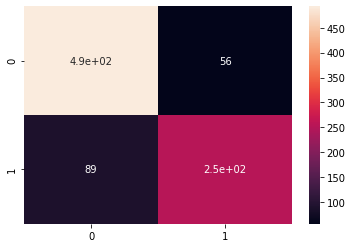

In [177]:
gbc_confusion = confusion_matrix(y_train, gbc_best_pred)
sns.heatmap(gbc_confusion, annot=True);

**2. Precision, Recall and F1-score**

In [178]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", round(precision_score(y_train, gbc_best_pred),2))
print("Recall:", round(recall_score(y_train, gbc_best_pred),2))
print("F1-score: ", round(f1_score(y_train, gbc_best_pred),2))

Precision: 0.82
Recall: 0.74
F1-score:  0.78


**3. Precision Recall Curve**

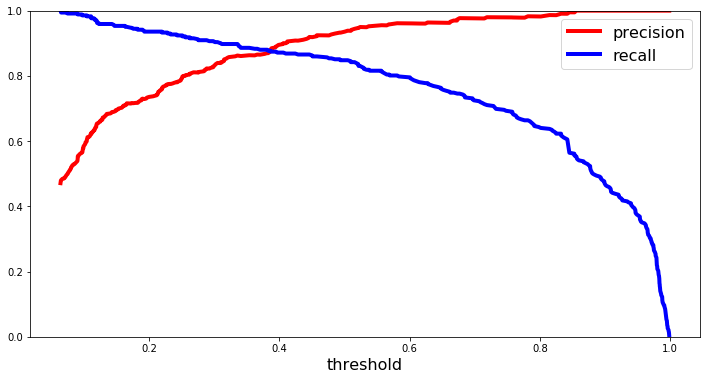

In [179]:
from sklearn.metrics import precision_recall_curve

# Get the probabilities of predictions
gbc_y_scores = best_gbc_model.predict_proba(X_train)
gbc_y_scores = gbc_y_scores[:,1]

gbc_precision, gbc_recall, gbc_threshold = precision_recall_curve(y_train,
                                                                  gbc_y_scores)

# Create a plot
def plot_precision_recall(precision, recall, threshold):
    # Plot for precision)
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=4)
    # Plot for recall
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=4)
    # Description
    plt.xlabel("threshold", fontsize=16)
    plt.legend(loc="upper right", fontsize=16)
    plt.ylim(0,1)

plt.figure(figsize=(12,6))
plot_precision_recall(gbc_precision, gbc_recall, gbc_threshold)
plt.show()

**4. Precision vs Recall**

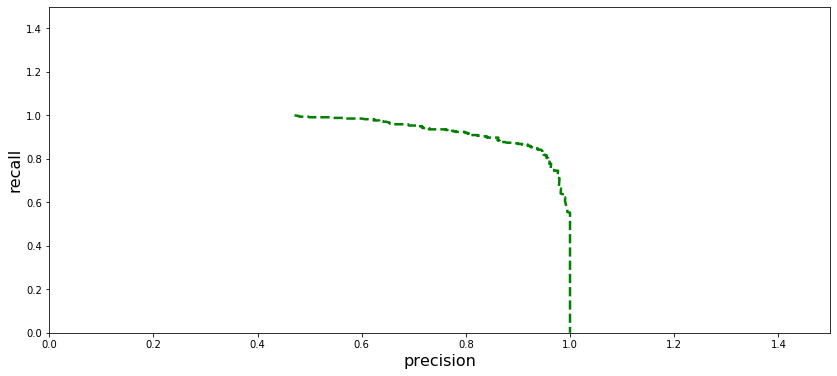

In [180]:
# Another way
def plot_precision_vs_recall(precision, recall):
    plt.plot(precision, recall, "g--", linewidth=2.5)
    plt.xlabel("precision", fontsize=16)
    plt.ylabel("recall", fontsize=16)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14,6))
plot_precision_vs_recall(gbc_precision, gbc_recall)
plt.show()   

**5. ROC AUC Curve**

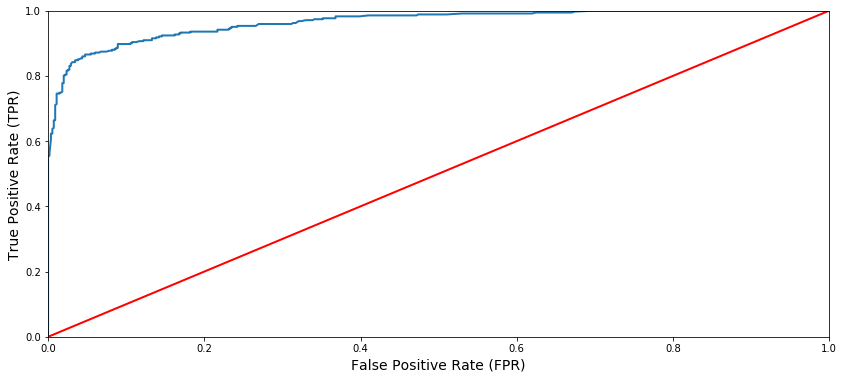

In [181]:
from sklearn.metrics import roc_curve

# Compute true positive rate and false positive rate
gbc_false_positive_rate, gbc_true_positive_rate, thresholds = roc_curve(y_train,
                                                                        gbc_y_scores)

# Plot them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    # Create plot
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2,label=label)
    # Plot diagonal line
    plt.plot([0,1], [0,1], "r", linewidth=2)
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate (FPR)", fontsize=14)
    plt.ylabel("True Positive Rate (TPR)", fontsize=14)
    
plt.figure(figsize=(14,6))
plot_roc_curve(gbc_false_positive_rate, gbc_true_positive_rate)
plt.show()

In [182]:
from sklearn.metrics import roc_auc_score

gbc_roc_score = roc_auc_score(y_train, gbc_y_scores)
print("ROC-AUC-Score: ", round(gbc_roc_score, 2),"%")

ROC-AUC-Score:  0.96 %


# 2. Random Forest Classifier with Test dataset

In [183]:
# Instantiate Random Forest with the best parameters found by GridSearchCV
best_rfc_model = RandomForestClassifier(max_features="log2",
                                        min_samples_leaf=2,
                                        min_samples_split=2,
                                        n_estimators=100,
                                        random_state=45)
# Fit model
best_rfc_model.fit(X_train, y_train)

# Make predictions on test dataset
rfc_predictions = best_rfc_model.predict(X_test)

# Cross-validation for the model
rfc_best_pred = model_selection.cross_val_predict(best_rfc_model,
                                                  X_train,
                                                  y_train,
                                                  n_jobs=-1,
                                                  verbose=0,
                                                  cv=10)

# Accuracy score for the model with best parameters
best_rfc_cv_acc = round(accuracy_score(y_train, rfc_best_pred)*100,2)

In [184]:
best_rfc_cv_acc

83.5

**1. Confusion matrix and classification report for Random Forest**

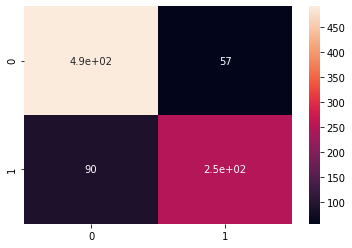

In [185]:
rfc_confusion = confusion_matrix(y_train, rfc_best_pred)
sns.heatmap(rfc_confusion, annot=True);

In [186]:
print(confusion_matrix(y_train, rfc_best_pred))
print(classification_report(y_train, rfc_best_pred))

[[492  57]
 [ 90 252]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       549
           1       0.82      0.74      0.77       342

    accuracy                           0.84       891
   macro avg       0.83      0.82      0.82       891
weighted avg       0.83      0.84      0.83       891



**2. Precision, recall and F1-score**

In [188]:
print("Precision: ", round(precision_score(y_train, rfc_best_pred),2))
print("Recall: ", round(recall_score(y_train, rfc_best_pred),2))
print("F1-score: ",round(f1_score(y_train, rfc_best_pred),2))

Precision:  0.82
Recall:  0.74
F1-score:  0.77


**3. Precision Recall Curve**

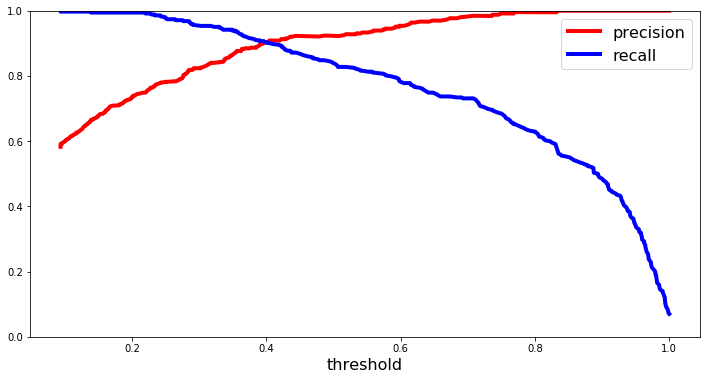

In [189]:
# Get the probabilities of predictions
rfc_y_scores = best_rfc_model.predict_proba(X_train)
rfc_y_scores = rfc_y_scores[:,1]

rfc_precision, rfc_recall, rfc_thresholds = precision_recall_curve(y_train,
                                                                   rfc_y_scores)
# Create plot
plt.figure(figsize=(12,6))
plot_precision_recall(rfc_precision, rfc_recall, rfc_thresholds)
plt.show()

**4. Precision vs Recall**

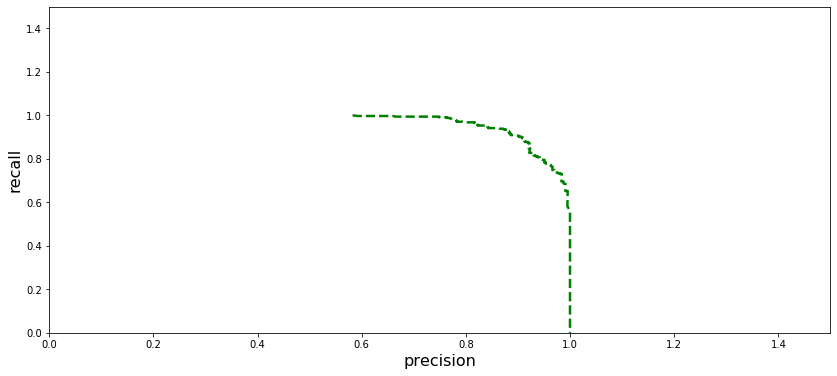

In [190]:
# Another way
plt.figure(figsize=(14,6))
plot_precision_vs_recall(rfc_precision, rfc_recall)
plt.show()

**5. ROC AUC Curve**

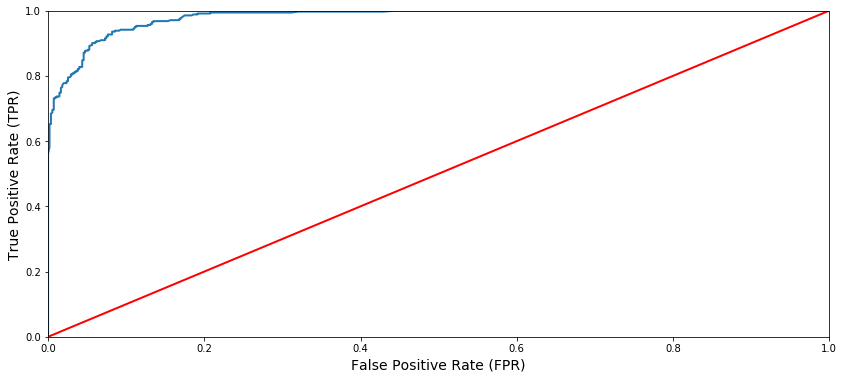

In [191]:
# Compute true positive rate and false positive rate
rfc_false_positive_rate, rfc_true_positive_rate, thresholds = roc_curve(y_train,
                                                                        rfc_y_scores)

# Create plot
plt.figure(figsize=(14,6))
plot_roc_curve(rfc_false_positive_rate, rfc_true_positive_rate)
plt.show()

In [192]:
rfc_roc_score = roc_auc_score(y_train, rfc_y_scores)
print("ROC-AUC-Score: ", round(rfc_roc_score)*100,"%")

ROC-AUC-Score:  100.0 %


# 3. CatBoost metrics

In [194]:
metrics = ["Precision", "Recall", "F1", "AUC"]

eval_metrics = catboost_model.eval_metrics(train_pool, 
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+ ": {}".format(round(np.mean(eval_metrics[metric]),2)),"%")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.9 %
Recall: 0.76 %
F1: 0.82 %
AUC: 0.93 %


In [197]:
# For Gradient Boost
print("Precision:", round(precision_score(y_train, gbc_best_pred),2),"%")
print("Recall:", round(recall_score(y_train, gbc_best_pred),2),"%")
print("F1-score: ", round(f1_score(y_train, gbc_best_pred),2),"%")
print("ROC-AUC-Score: ", round(gbc_roc_score, 2),"%")

Precision: 0.82 %
Recall: 0.74 %
F1-score:  0.78 %
ROC-AUC-Score:  0.96 %


In [198]:
# For Random Forest
print("Precision: ", round(precision_score(y_train, rfc_best_pred),2),"%")
print("Recall: ", round(recall_score(y_train, rfc_best_pred),2),"%")
print("F1-score: ",round(f1_score(y_train, rfc_best_pred),2),"%")
print("ROC-AUC-Score: ", round(rfc_roc_score)*100,"%")

Precision:  0.82 %
Recall:  0.74 %
F1-score:  0.77 %
ROC-AUC-Score:  100.0 %


* If Recall is low, it means there is higher amount of false negative (predict Did NOT Survived when actually survived)

* When Precision is higher, it means less false positive( predict survived when actually not survived)

* Fi-score is a harmonic mean of (Precision and Recall)

* ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes.

# Feature importance of the chosen models

**1. CatBoost**

In [199]:
# Create a function to create plot
def feature_importance(model, df):
    """
    Function show which features are most important in the model
    """
    
    feat_imp = pd.DataFrame({"Importance": model.feature_importances_,
                             "Column":  df.columns})
    feat_imp = feat_imp.sort_values(["Importance", "Column"], 
                                     ascending=[False, True],
                                     ignore_index=True).iloc[-30:]
    
    plt.figure(figsize=(20,10))
    sns.barplot(y="Column", x="Importance", data=feat_imp,
                orient="horizontal",palette="winter_r")
    
    # plt.title("Gradient Boost Feature Importance for Titanic Project")
    # plt.savefig("Catboost_feature_importance.png")
    # plt.savefig("Gradient_Boost_imp_feature_importance.png")
    # plt.savefig("Random_Forest_feature_importance.png")
    return feat_imp 

,Importance,Column
0,20.445714,Pclass
1,16.545233,Title
2,14.293258,Person
3,13.509072,Fare
4,12.649602,Age
5,8.251594,SibSp
6,7.804252,Embarked
7,6.501274,Parch


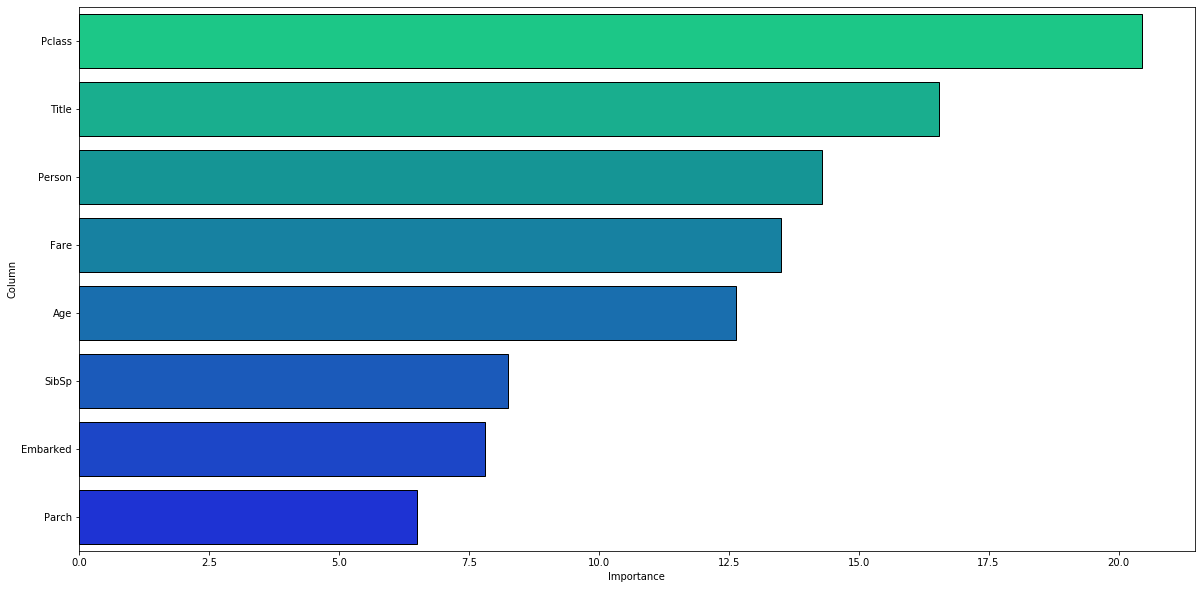

In [200]:
feature_importance(catboost_model, X_train)

**2. Gradient Boost Classifier Feature Importance**

,Importance,Column
0,0.321944,Person
1,0.180994,Fare
2,0.152093,Age
3,0.142835,Pclass
4,0.109440,Title
5,0.051535,SibSp
6,0.023313,Embarked
7,0.017846,Parch


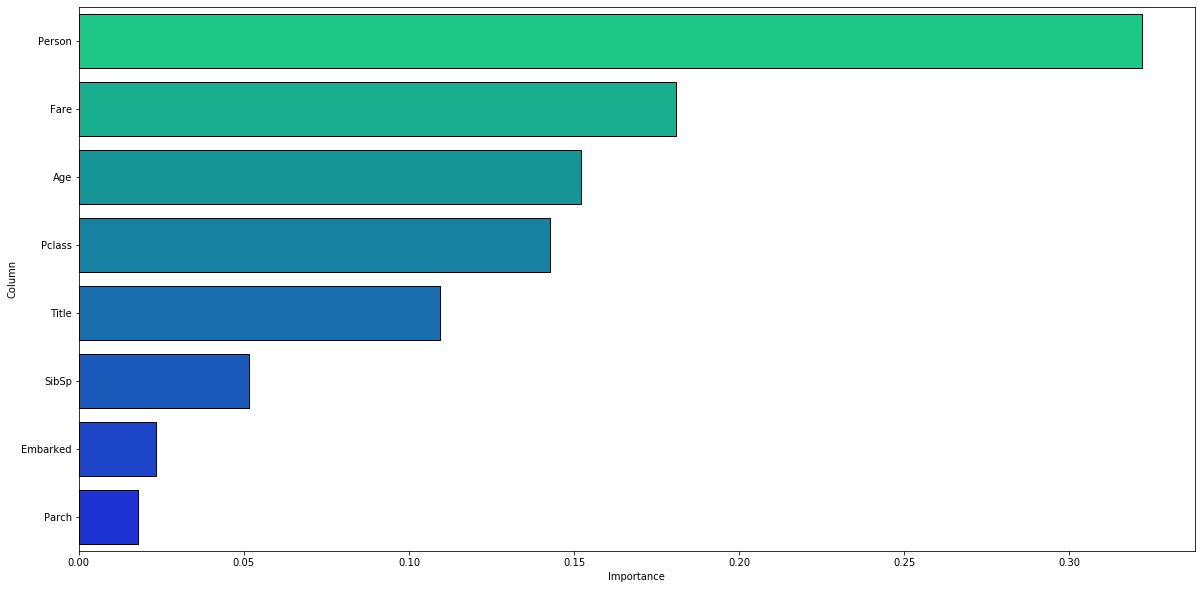

In [201]:
feature_importance(best_gbc_model, X_train)

> Both Random Forest and Gradient Boost feature importance shows that column "Embarked" and "Parch" importance is low. We could ran the models again and see how it perform without this columns

**3. Random Forest Classifier Feature Importance**

,Importance,Column
0,0.265394,Person
1,0.218034,Fare
2,0.166595,Age
3,0.122482,Title
4,0.109019,Pclass
5,0.062108,SibSp
6,0.028478,Embarked
7,0.027890,Parch


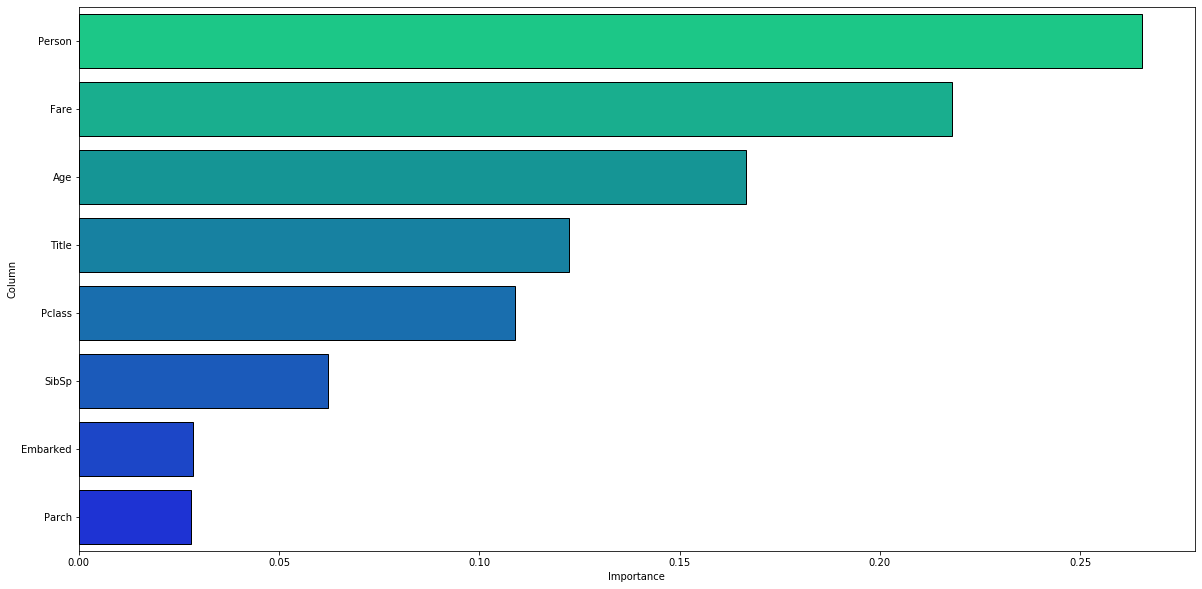

In [202]:
feature_importance(best_rfc_model, X_train)

# Gradient Boost Classifier without "Embarked" and "Parch" column

In [203]:
X_train_col_d = X_train.drop(["Embarked", "Parch"], axis=1)
X_test_col_d = X_test.drop(["Embarked", "Parch"], axis=1)

In [204]:
#Instantiate Gradient Boost
gbc_model = GradientBoostingClassifier(max_features="sqrt",
                                       min_samples_split=8,
                                       min_samples_leaf=1,
                                       n_estimators=300,
                                       random_state=45)

# Fit data
gbc_model.fit(X_train_col_d, y_train)

# Make predictions on test set
gbc_pred = gbc_model.predict(X_test_col_d)

# Cross-validation for the model
gbc_pred_cv = model_selection.cross_val_predict(gbc_model,
                                                X_train_col_d,
                                                y_train,
                                                n_jobs=-1,
                                                cv=10)
# Accuracy score for the model with best parameters
gbc_cv_acc_d = round(accuracy_score(y_train, gbc_pred_cv)*100,2)
gbc_cv_acc_d

84.18

In [205]:
# Accuracy dataframe for the models with cv=10
df_models_4 =  pd.DataFrame({
      "Models": ["Logistic Regression","KNN","Naive Bayes",
                 "Linear SVC", "Random Forest Best Param","Decision Tree",
                 "Gradient Boost Col Drop","CatBoost"],
      "Score": [lr_cv_acc,
                knn_cv_acc,
                gnb_cv_acc,
                svc_cv_acc,
                best_rfc_cv_acc,
                dtc_cv_acc,
                gbc_cv_acc_d,
                cat_cv_acc
               ]})

print("***Cross Validation Models Accuracy***")
df_models_4.sort_values(by="Score", ascending=False, ignore_index=True)

***Cross Validation Models Accuracy***


,Models,Score
0,Gradient Boost Col Drop,84.18
1,CatBoost,83.62
2,Random Forest Best Param,83.50
3,Logistic Regression,80.47
4,Naive Bayes,79.01
5,Decision Tree,78.56
6,KNN,69.70
7,Linear SVC,67.68


,Importance,Column
0,0.297221,Person
1,0.207158,Fare
2,0.153465,Title
3,0.147167,Age
4,0.133966,Pclass
5,0.061023,SibSp


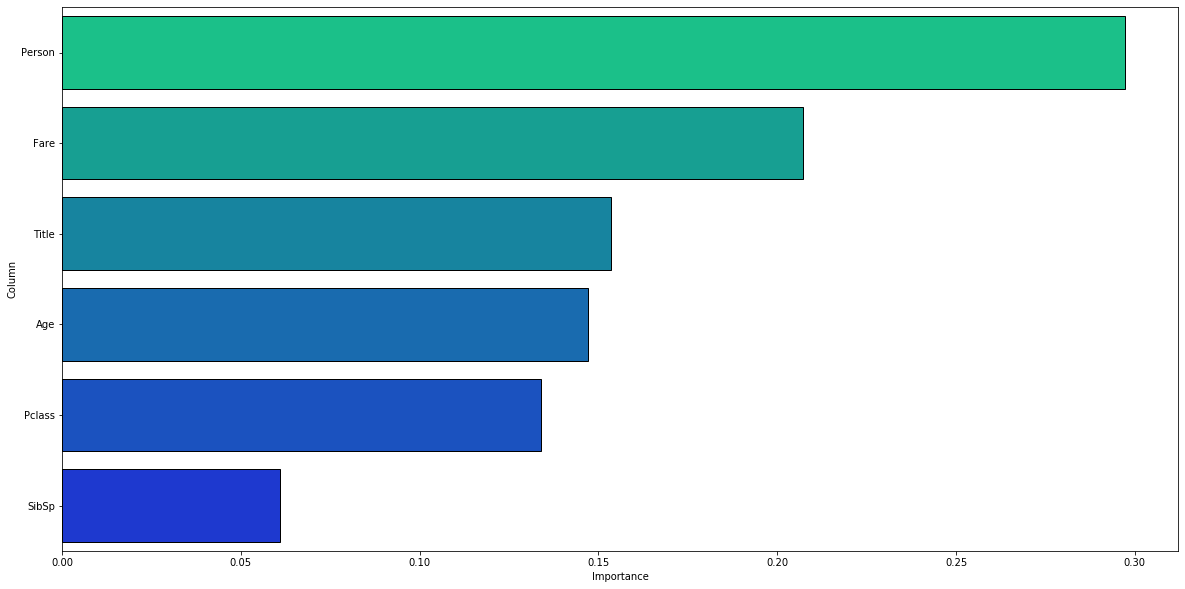

In [206]:
feature_importance(gbc_model, X_train_col_d)

# Catboost without "Embarked" and "Parch" columns

In [ ]:
cat_feature = np.where(X_train_col_d.dtypes !=np.float)[0]

train_pool = Pool(X_train_col_d, y_train, cat_feature)

# Instatiate model
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=["Accuracy"],
                                    loss_function="Logloss")
# Fit the model
catboost_model.fit(train_pool, plot=True)

# Accuracy for catboost
cat_acc = round(catboost_model.score(X_train_col_d, y_train)*100,2)
print(f"Accuracy: {cat_acc}%")

In [ ]:
cv_params = catboost_model.get_params()

# Run Cross-validation for catboost
cv_catboost = cv(train_pool, 
              cv_params,
              fold_count=10,
              plot=False)

# Catboost result save later into dataframe 
cat_cv_acc_imp = round(np.max(cv_catboost["test-Accuracy-mean"]) *100 ,2)

In [ ]:
feature_importance(catboost_model, X_train_col_d)

In [ ]:
# Accuracy dataframe for the models with cv=10
df_models_5 =  pd.DataFrame({
      "Models": ["Logistic Regression","KNN","Naive Bayes",
                 "Linear SVC", "Random Forest Best Param","Decision Tree",
                 "Gradient Boost Col Drop","CatBoost Col Drop"],
      "Score": [lr_cv_acc,
                knn_cv_acc,
                gnb_cv_acc,
                svc_cv_acc,
                best_rfc_cv_acc,
                dtc_cv_acc,
                gbc_cv_acc_d,
                cat_cv_acc_imp
               ]})

print("***Cross Validation Models Accuracy***")
df_models_5.sort_values(by="Score", ascending=False, ignore_index=True)

# Save predictions and submit it to Kaggle

* For Gradient Boost

In [ ]:
# Create dataframe for submission to Kaggle
gbc_submission = pd.DataFrame()
gbc_submission["PassengerId"] = passengerId
gbc_submission["Survived"] = gbc_pred

# Convert into integers
gbc_submission["Survived"] = gbc_submission["Survived"].astype(int)

# Save to a file
gbc_submission.to_csv("kaggle _submissions/gbc_submission.csv", index=False)

* For Catboost

In [ ]:
# List of columns
list_col = X_train_col_d.columns
# Make predictions
cat_predictions = catboost_model.predict(X_test_col_d)

In [ ]:
# Create dataframe and save it to the file
cat_submission = pd.DataFrame()
cat_submission["PassengerId"] = passengerId
cat_submission["Survived"] = cat_predictions

# Convert into integers
cat_submission["Survived"] = cat_submission["Survived"].astype(int)

# Save it to a file
cat_submission.to_csv("data/cat_submission.csv", index=False)

   * Random Forest Classifier

In [208]:
# # Create dataframe
# forest_submission = pd.DataFrame()
# forest_submission["PassengerId"] = passengerId
# forest_submission["Survived"] = rfc_predictions

# # Convert into integers
# forest_submission["Survived"] = forest_submission["Survived"].astype(int)

# # Save it to a file
# forest_submission.to_csv("data/forest_submission.csv", index=False)